# **TEAM 2 - Pallavi, Hao, Bryan, Neelabja, Jess**

# **SDOT COLLISIONS ANALYSIS**

###**Overview**

According to "The Seattle Times":

Washington recorded another grim milestone this week, with numbers from the Washington Traffic Safety Commission showing yet another year of increasing fatalities on the state’s roads.

Statewide, 810 people were killed in crashes involving a motor vehicle in 2023, a 33-year high. That’s up from 743 in 2022, and nearly double from 2014, when 462 people were killed in traffic.

Washington’s Traffic Safety Commission states that,

809 people killed were killed on Washington roads in 2023. At the end of November, there were 645 reported traffic fatalities recorded in 2024. Despite some necessary improvements, Trooper DeHart is urging safety and intention as drivers roll in to 2025.

The upward trend bucks national behavior, where traffic deaths have fallen two years in row despite an increase in the number of miles driven. Last year, 40,990 people died on U.S. roads, a 3.6% decrease from 2022, according to the National Highway Traffic Safety Administration.

###**Dataset**

The dataset provided by the Seattle Department of Transportation (SDOT) consists of 50 columns having different kinds of data like, collision severity, road conditions, number of people involved, location of collision, weather etc.

Data Source : https://www.arcgis.com/home/item.html?id=504838adcb124cf4a434e33bf420c4ad&sublayer=0#data

Data Catalouge: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

Time Frame: 2004 to Present



###**Objective**

According to the annual United States road crash statistics by ASIRT, more than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. It is evident that with the increasing number of vehicles on urban and suburban roads, the cases of vehicle accidents are also increasing. This project aims to analyse collision data available in public domain provided by Seattle Geo Data (SDOT) and derive some useful insights.

Data provided by the Seattle Department of Transportation (SDOT) on along with its severity might be useful to get insights and may show some pattern with the environmental factors like weather, road conditions etc.

Goals:

- 🗺️ Visualize trends: Time, and frequency of accidents.¶
- 🧩 Identify patterns: Factors like weather, time of day, or road conditions.
- 📊 Draw actionable insights: Highlight critical points for improved safety.


# **Data Pre-Processing**

**Importing Libraries**

In [ ]:
#Installing necessary packages
!pip install ydata-profiling

In [ ]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
from ydata_profiling import ProfileReport
from pyproj import Transformer
import plotly.express as px
import pprint
import plotly.graph_objs as go
import calendar
import missingno as msno
mpl.style.use('ggplot')

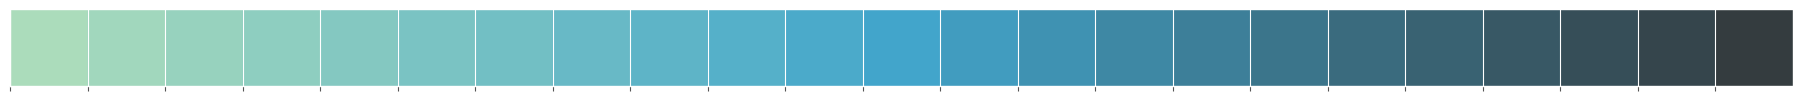

In [ ]:
#setting sns color pallette
sns.palplot(sns.color_palette("GnBu_d",23))
sns.set_palette(sns.color_palette("GnBu_d",23))

**Reading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data file name
filename = "/content/drive/MyDrive/MSCM GROUP 2: WI  SP/SQL/RawData/SDOT_Collisions_All_Years.csv"

# Read the whole data file
df = pd.read_csv(filename, low_memory=False)

print("Data read into dataframe!")


Data read into dataframe!


In [ ]:
# making a copy of the data so we can go back to the original data
df_cpy = df.copy()

print("Dataframe copied!")

Dataframe copied!


In [ ]:
# Looking for more info about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253884 entries, 0 to 253883
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OBJECTID                        253884 non-null  int64  
 1   SE_ANNO_CAD_DATA                253884 non-null  object 
 2   INCKEY                          253884 non-null  int64  
 3   COLDETKEY                       253884 non-null  int64  
 4   REPORTNO                        253884 non-null  object 
 5   STATUS                          253884 non-null  object 
 6   ADDRTYPE                        249903 non-null  object 
 7   INTKEY                          85134 non-null   float64
 8   LOCATION                        248953 non-null  object 
 9   EXCEPTRSNCODE                   13014 non-null   object 
 10  EXCEPTRSNDESC                   13014 non-null   object 
 11  SEVERITYCODE                    253883 non-null  object 
 12  SEVERITYDESC    

In [ ]:
#shape of the data
df.shape

(253884, 50)

The dataset consists of 50 distinct columns and 253884 rows

In [ ]:
# Take a quick look at the data
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added date,Modified date,SHAREDMICROMOBILITYCD,SHAREDMICROMOBILITYDESC,x,y
0,30449598,System.Byte[],363281,364761,3919347,Matched,Intersection,29913.0,5TH AVE AND UNION ST,NaN,...,N,23-191385,PTCR,Police Traffic Collision Report,7/12/2023 12:00:00 AM,12/7/2023 12:00:00 AM,NaN,NaN,1.270107e+06,226006.944667
1,30449599,System.Byte[],1147,1147,3548946,Unmatched,Block,NaN,MARION ST BETWEEN 1ST AVE AND 2ND AVE,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,4/3/2013 12:00:00 AM,5/27/2014 12:00:00 AM,NaN,NaN,1.269978e+06,224013.432217
2,30449600,System.Byte[],371998,373478,3923038,Matched,Block,NaN,SW HANFORD ST BETWEEN 40TH AVE SW AND WALNUT A...,NaN,...,N,2024-137834,PTCR,Police Traffic Collision Report,5/23/2024 12:00:00 AM,9/10/2024 12:00:00 AM,NaN,NaN,1.257927e+06,213814.962703
3,30449601,System.Byte[],61600,61600,2617309,Matched,Intersection,29053.0,10TH AVE E AND E JOHN ST,NaN,...,N,06-546709,PTCR,Police Traffic Collision Report,12/28/2006 12:00:00 AM,5/15/2007 12:00:00 AM,NaN,NaN,1.273909e+06,229666.025887
4,30449602,System.Byte[],68500,68500,2792365,Matched,Block,NaN,24TH AVE NW BETWEEN NW 59TH ST AND NW 60TH ST,NaN,...,N,07-279095,PTCR,Police Traffic Collision Report,7/16/2007 12:00:00 AM,9/7/2007 12:00:00 AM,NaN,NaN,1.257514e+06,248995.161779


In [ ]:
#lets take a look at the columns
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'x', 'y'],
      dtype='object')

In [ ]:
#Basic statistics of numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,253884.0,3.057654e+07,7.329014e+04,3.044960e+07,3.051307e+07,3.057654e+07,3.064001e+07,3.070348e+07
INCKEY,253884.0,1.717448e+05,1.092240e+05,1.001000e+03,7.975975e+04,1.436625e+05,2.513852e+05,3.797240e+05
COLDETKEY,253884.0,1.721343e+05,1.097626e+05,1.001000e+03,7.975975e+04,1.436625e+05,2.519852e+05,3.812440e+05
INTKEY,85134.0,3.838781e+04,5.534864e+04,2.380700e+04,2.868100e+04,3.012400e+04,3.410500e+04,8.584530e+05
PERSONCOUNT,253884.0,2.236636e+00,1.437807e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.300000e+01
PEDCOUNT,253884.0,3.925809e-02,2.045218e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
PEDCYLCOUNT,253884.0,2.811520e-02,1.667967e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
VEHCOUNT,253884.0,1.692360e+00,8.652029e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.500000e+01
INJURIES,253884.0,3.752383e-01,7.254777e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.800000e+01
SERIOUSINJURIES,253884.0,1.715350e-02,1.625024e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.100000e+01


In [ ]:
# check for null data
df.isnull().sum()

,0
OBJECTID,0
SE_ANNO_CAD_DATA,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,3981
INTKEY,168750
LOCATION,4931
EXCEPTRSNCODE,240870


In [ ]:
# check for duplicated data
df.duplicated().sum()

np.int64(0)

**Correlation heatmap**

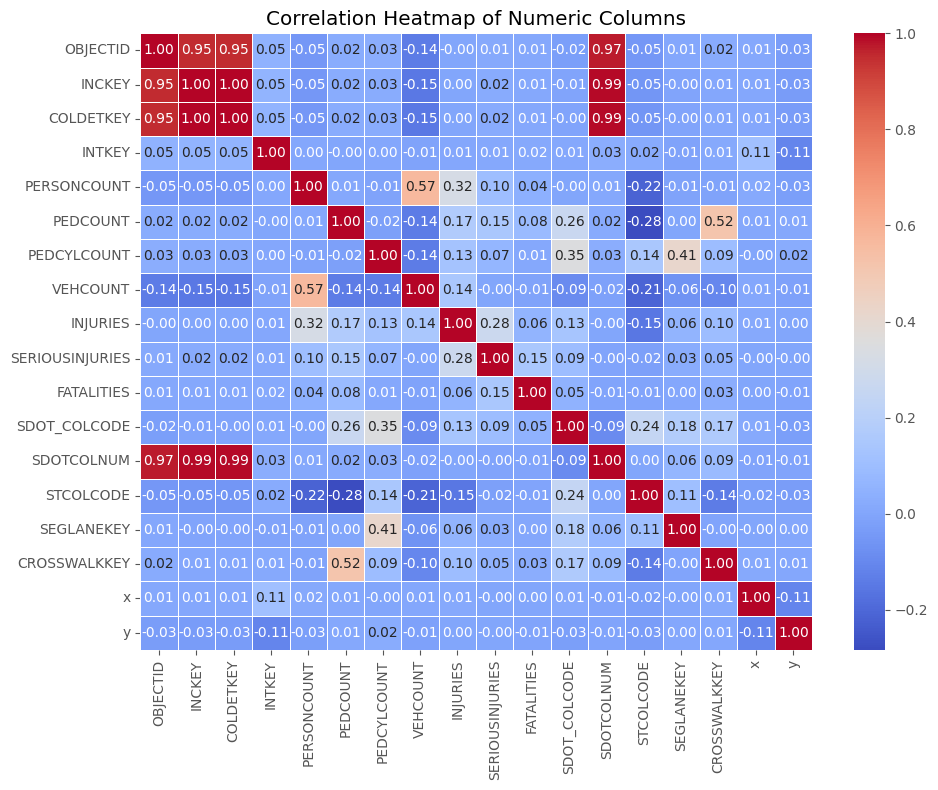

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()


Insights:

*   The dataset contains several identifiers (OBJECTID, INCKEY, COLDETKEY, and SDOTCOLNUM) that are highly correlated, likely representing event or incident IDs.
*   Variables like PERSONCOUNT, VEHCOUNT, and INJURIES show meaningful relationships, suggesting these factors could be important for analyzing incidents involving multiple people or vehicles.
*   Spatial coordinates (X, Y) and categorical codes (STCOCODE) appear to have little correlation with other numeric variables, implying they may serve a different purpose in analysis (e.g., location mapping).
*   A moderate positive correlation between person count and vehicle count suggests that as the number of people involved increases, the number of vehicles involved also tends to increase.
*   A weaker but positive correlation between injuries and person count indicates that injuries increase with the number of people involved.















**Initial Data Processing**

**1. Change column names**

In [ ]:
df.rename(columns={'x':'Longitude', 'y': 'Latitude'}, inplace=True)

**2. INCDATE - It has date of the recorded accident. We can extract the year, month, and weekday information.**

In [ ]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
# Convert INCDATE to date type

df['INCDATE'] = pd.to_datetime(df['INCDATE'])

# Extract month, weekday information

df['Year']=df['INCDATE'].dt.year
df['Month']=df['INCDATE'].dt.month
df['Weekday']=df['INCDATE'].dt.day_name()


<ipython-input-144-47cbc9de3922>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'Longitude', 'Latitude', 'Year', 'Month', 'Weekday'],
      dtype='object')

**3. INCDTTM - It has both date and time of the recorded accident. We can extract the hour information.**

In [ ]:
year_counts = df['INCDTTM'].value_counts(dropna=False)
print(year_counts)

INCDTTM
11/2/2006                103
10/8/2004                 98
10/3/2008                 92
11/5/2005                 85
1/2/2004                  80
                        ... 
5/1/2023 9:57:00 AM        1
5/17/2023 1:04:00 PM       1
3/25/2013 6:40:00 AM       1
10/22/2005 4:41:00 PM      1
7/10/2023 6:18:00 PM       1
Name: count, Length: 194726, dtype: int64


In [ ]:
df["INCTIME"] = pd.to_datetime(df["INCDTTM"])
for idx, dt in enumerate(df["INCDTTM"]):
    if ':' not in dt:
        df["INCTIME"][idx] = np.nan

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df["TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=b, labels=l, include_lowest=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-147-d9008efeb6d1>:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-147-d9008efeb6d1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a sli

In [ ]:
1 - (df["TIMEOFDAY"].isnull().sum() / len(df))

np.float64(0.760197570544028)

We have time of accident for ~76% of data. In order to analyse timewise, splitting the data into 6 categories viz. 'Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night'

In [ ]:
pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

,TIME
Late Night,00:00 to 04:00
Early Morning,04:00 to 08:00
Morning,08:00 to 12:00
Noon,12:00 to 16:00
Eve,16:00 to 20:00
Night,20:00 to 00:00


In [ ]:
pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY']).count())

<ipython-input-150-1dbeaf158a29>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,OBJECTID
TIMEOFDAY,
Late Night,16809
Early Morning,23555
Morning,39528
Noon,51760
Eve,42490
Night,18860


In [ ]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'Longitude', 'Latitude', 'Year', 'Month', 'Weekday', 'INCTIME',
       'TIMEOFDAY'],
      dtype='object')

In [ ]:
year_counts = df['INCTIME'].value_counts(dropna=False)
print(year_counts)

INCTIME
NaT                    60882
2010-11-22 19:00:00        7
2008-12-19 00:01:00        6
2021-06-16 19:39:00        5
2010-11-22 18:00:00        5
                       ...  
2010-03-02 14:40:00        1
2010-01-06 08:24:00        1
2010-01-13 17:58:00        1
2010-04-03 05:15:00        1
2010-11-10 19:00:00        1
Name: count, Length: 187663, dtype: int64


In [ ]:
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,Modified date,SHAREDMICROMOBILITYCD,SHAREDMICROMOBILITYDESC,Longitude,Latitude,Year,Month,Weekday,INCTIME,TIMEOFDAY
0,30449598,System.Byte[],363281,364761,3919347,Matched,Intersection,29913.0,5TH AVE AND UNION ST,NaN,...,12/7/2023 12:00:00 AM,NaN,NaN,1.270107e+06,226006.944667,2023,7,Friday,2023-07-07 17:07:00,Eve
1,30449599,System.Byte[],1147,1147,3548946,Unmatched,Block,NaN,MARION ST BETWEEN 1ST AVE AND 2ND AVE,NaN,...,5/27/2014 12:00:00 AM,NaN,NaN,1.269978e+06,224013.432217,2013,3,Friday,NaT,NaN
2,30449600,System.Byte[],371998,373478,3923038,Matched,Block,NaN,SW HANFORD ST BETWEEN 40TH AVE SW AND WALNUT A...,NaN,...,9/10/2024 12:00:00 AM,NaN,NaN,1.257927e+06,213814.962703,2024,5,Tuesday,2024-05-21 08:40:00,Early Morning
3,30449601,System.Byte[],61600,61600,2617309,Matched,Intersection,29053.0,10TH AVE E AND E JOHN ST,NaN,...,5/15/2007 12:00:00 AM,NaN,NaN,1.273909e+06,229666.025887,2006,12,Wednesday,2006-12-27 12:28:00,Morning
4,30449602,System.Byte[],68500,68500,2792365,Matched,Block,NaN,24TH AVE NW BETWEEN NW 59TH ST AND NW 60TH ST,NaN,...,9/7/2007 12:00:00 AM,NaN,NaN,1.257514e+06,248995.161779,2007,7,Saturday,NaT,NaN


**4. SEVERITYCODE - The categorical values can also be remapped to a scale of 1 to 4, where 3 is assigned to 4 and 2b to 3.**


The new mapping is as follows:

    SEVERITYCODE        SEVERITYDESC
    0                   Unknown
    1	               Property Damage Only Collision
    2	               Injury Collision
    3	               Serious Injury Collision
    4	               Fatality Collision

In [ ]:
df['SEVERITYCODE'].value_counts(dropna=False)

,count
SEVERITYCODE,
1,156347
2,67622
0,25348
2b,4082
3,484
NaN,1


In [ ]:
# Assuming that the missing SEVERITYCODE must belong to unknown category i.e. Category 0.

df['SEVERITYCODE'].replace(np.nan, '0', inplace=True)

<ipython-input-155-f6a2c8d9a117>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['SEVERITYCODE'].value_counts(dropna=False)

,count
SEVERITYCODE,
1,156347
2,67622
0,25349
2b,4082
3,484


In [ ]:
#Shift Severity 3 to 4
df['SEVERITYCODE'].replace('3', '4', inplace=True)

<ipython-input-157-8bc7dfd0f14d>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['SEVERITYCODE'].value_counts(dropna=False)

,count
SEVERITYCODE,
1,156347
2,67622
0,25349
2b,4082
4,484


In [ ]:
#Shift Severity 2b to 3
df['SEVERITYCODE'].replace('2b', '3', inplace=True)

<ipython-input-159-391343ea3e1d>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['SEVERITYCODE'].value_counts(dropna=False)

,count
SEVERITYCODE,
1,156347
2,67622
0,25349
3,4082
4,484


In [ ]:
#The code calculates the relative frequencies (proportions) of each unique value in the 'SEVERITYCODE' column, including NaN values, and rounds the result to 5 decimal places.

df['SEVERITYCODE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

,proportion
SEVERITYCODE,
1,0.61582
2,0.26635
0,0.09984
3,0.01608
4,0.00191


We can see that 62% of accidents belong to Category 1 which is "Property Damage Only Collision" 26% belong to Category 2, "Injury Collision"

**5. SEVERITYDESC - Convert fatal collision to fatality collision**

In [ ]:
df['SEVERITYDESC'].value_counts(dropna=False)

,count
SEVERITYDESC,
Property Damage Only Collision,156347
Injury Collision,67622
Unknown,25349
Serious Injury Collision,4082
Fatality Collision,483
Fatal Collision,1


In [ ]:
df['SEVERITYDESC'].replace('Fatal Collision', 'Fatality Collision', inplace=True)

<ipython-input-163-47033423d292>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['SEVERITYDESC'].value_counts(dropna=False)

,count
SEVERITYDESC,
Property Damage Only Collision,156347
Injury Collision,67622
Unknown,25349
Serious Injury Collision,4082
Fatality Collision,484


**6. UNDERINFL - map 0 to 'N', 1 to 'Y' and NaN as 'Unknown'**

In [ ]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

,proportion
UNDERINFL,
N,0.503238
0,0.321580
NaN,0.136838
Y,0.021683
1,0.016661


In [ ]:
df.replace({'UNDERINFL' : {np.nan : 'Unknown', '0': 'N', '1': 'Y'}}, inplace=True)

In [ ]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

,proportion
UNDERINFL,
N,0.824818
Unknown,0.136838
Y,0.038344


**7. JUNCTIONTYPE - Replace with compact descriptions**

In [ ]:
df['JUNCTIONTYPE'].value_counts(dropna=False)

,count
JUNCTIONTYPE,
Mid-Block (not related to intersection),118468
At Intersection (intersection related),82287
Mid-Block (but intersection related),25320
NaN,13128
Driveway Junction,11792
At Intersection (but not related to intersection),2630
Ramp Junction,193
Unknown,66


In [ ]:
df.replace({'JUNCTIONTYPE' : {'Mid-Block (not related to intersection)': 'Mid-Block (Not Intersect)',
                              'At Intersection (intersection related)': 'At Intersection (Intersect)',
                              'Mid-Block (but intersection related)': 'Mid-Block (Intersect)',
                              'At Intersection (but not related to intersection)': 'At Intersection (Intersect)'}}, inplace=True)

In [ ]:
df['JUNCTIONTYPE'].value_counts(dropna=False)

,count
JUNCTIONTYPE,
Mid-Block (Not Intersect),118468
At Intersection (Intersect),84917
Mid-Block (Intersect),25320
NaN,13128
Driveway Junction,11792
Ramp Junction,193
Unknown,66


**8. Convert x and y values into longitudes and latitudes**

In [ ]:
# Initialize the transformer (State Plane EPSG:2926 to WGS84 EPSG:4326)
transformer = Transformer.from_crs("EPSG:2926", "EPSG:4326", always_xy=True)

# Ensure 'X' and 'Y' columns exist before conversion
if 'Longitude' in df.columns and 'Latitude' in df.columns:
    # Perform vectorized transformation
    df['Longitude'], df['Latitude'] = transformer.transform(df['Longitude'].to_numpy(), df['Latitude'].to_numpy())

    print("Transformation complete. X and Y have been replaced with Longitude and Latitude.")
    print(df.head())

else:
    print("Error: Columns 'X' and 'Y' not found in DataFrame.")

Transformation complete. X and Y have been replaced with Longitude and Latitude.
   OBJECTID SE_ANNO_CAD_DATA  INCKEY  COLDETKEY REPORTNO     STATUS  \
0  30449598    System.Byte[]  363281     364761  3919347    Matched   
1  30449599    System.Byte[]    1147       1147  3548946  Unmatched   
2  30449600    System.Byte[]  371998     373478  3923038    Matched   
3  30449601    System.Byte[]   61600      61600  2617309    Matched   
4  30449602    System.Byte[]   68500      68500  2792365    Matched   

       ADDRTYPE   INTKEY                                           LOCATION  \
0  Intersection  29913.0                               5TH AVE AND UNION ST   
1         Block      NaN              MARION ST BETWEEN 1ST AVE AND 2ND AVE   
2         Block      NaN  SW HANFORD ST BETWEEN 40TH AVE SW AND WALNUT A...   
3  Intersection  29053.0                           10TH AVE E AND E JOHN ST   
4         Block      NaN      24TH AVE NW BETWEEN NW 59TH ST AND NW 60TH ST   

  EXCEPTRSNCODE  

In [ ]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'Longitude', 'Latitude', 'Year', 'Month', 'Weekday', 'INCTIME',
       'TIMEOFDAY'],
      dtype='object')

**9. Substituting Missing Values (Check from pdf if NAN actually is unknown or Y/N variable)**

In [ ]:
#Substitute Missing Address Type Values by Unknown
df['ADDRTYPE'].value_counts(normalize=True, ascending=False, dropna=False).round(5)
df.replace({'ADDRTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df['ADDRTYPE'].value_counts(dropna=False)

,count
ADDRTYPE,
Block,163819
Intersection,85134
Unknown,3981
Alley,950


In [ ]:
#Substitute Missing Address Type Values by Unknown
df['LOCATION'].value_counts(normalize=True, ascending=False, dropna=False).round(5)
df.replace({'LOCATION' : {np.nan : 'Unknown'}}, inplace=True)
df['LOCATION'].value_counts(dropna=False)

,count
LOCATION,
Unknown,4931
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,328
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,322
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,321
6TH AVE AND JAMES ST,306
...,...
HARBOR AVE SW AND SW MARYLAND PL,1
37TH AVE BETWEEN E OLIVE ST AND E HOWELL ST,1
1ST AVE N AND FULTON N ST,1


In [ ]:
#Substitute Missing Collision Type Values by Unknown

df['COLLISIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'COLLISIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df['COLLISIONTYPE'].value_counts(dropna=False)

,count
COLLISIONTYPE,
Parked Car,52923
Angles,40674
Rear Ended,38364
Unknown,34759
Other,28113
Sideswipe,21123
Left Turn,15877
Pedestrian,9050
Cycles,7010


In [ ]:
df['PERSONCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5).head()
#Since the x Person Count has a long list, we can consider the top few values only, and assign the rest of the codes to a category 'Other'.
#NO CHANGE

,proportion
PERSONCOUNT,
2,0.54274
3,0.16583
0,0.10234
1,0.06896
4,0.06748


In [ ]:
df['PEDCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
#no change

,proportion
PEDCOUNT,
0,0.96244
1,0.03610
2,0.00128
3,0.00012
4,0.00004
5,0.00001
6,0.00001


In [ ]:
df['PEDCYLCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
#no change

,proportion
PEDCYLCOUNT,
0,0.97213
1,0.02763
2,0.00024
3,0.00000


In [ ]:
df['VEHCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5).head()
#no change

,proportion
VEHCOUNT,
2,0.65655
0,0.13789
1,0.12950
3,0.06063
4,0.01157


In [ ]:
#Substitute Missing Junction Type Values by Unknown

df['JUNCTIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df['JUNCTIONTYPE'].value_counts(dropna=False)

,count
JUNCTIONTYPE,
Mid-Block (Not Intersect),118468
At Intersection (Intersect),84917
Mid-Block (Intersect),25320
Unknown,13194
Driveway Junction,11792
Ramp Junction,193


In [ ]:
#Substitute Missing Collision Desc Values by Unknown

df['SDOT_COLDESC'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'SDOT_COLDESC' : {np.nan: 'Unknown'}}, inplace=True)


In [ ]:
df['INATTENTIONIND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)

In [ ]:
#Substitute Missing Weather Values by Unknown

df['WEATHER'].value_counts(dropna=False, ascending=False)
df.replace({'WEATHER' : {np.nan : 'Unknown'}}, inplace=True)

In [ ]:
#Substitute Missing Road Condition Values by Unknown

df['ROADCOND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'ROADCOND' : {np.nan: 'Unknown'}}, inplace=True)

In [ ]:
#Substitute Missing Light Condition Values by Unknown

df['LIGHTCOND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'LIGHTCOND' : {np.nan: 'Unknown'}}, inplace=True)

In [ ]:
df['PEDROWNOTGRNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'PEDROWNOTGRNT' : {np.nan: 'N'}}, inplace=True)

In [ ]:
df['SPEEDING'].value_counts(normalize=True, ascending=False,dropna=False).round(5)
df.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)

In [ ]:
#Substitute Missing Collision Code Values by Code 31 which is Not Stated
df.replace({'STCOLCODE' : {np.nan: '31'}}, inplace=True)
df['STCOLCODE'].value_counts(dropna=False)

,count
STCOLCODE,
32.0,48898
10.0,40674
31,34759
14.0,28696
50.0,16796
...,...
87.0,2
49.0,1
60.0,1


In [ ]:
#Substitute Missing Collision Code DESC Values by Not Stated

df.replace({'ST_COLDESC' : {np.nan: 'Not Stated', ' ': 'Not Stated'}}, inplace=True)

**10. Dropping irrelevant columns**

In [ ]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC',
       'Longitude', 'Latitude', 'Year', 'Month', 'Weekday', 'INCTIME',
       'TIMEOFDAY'],
      dtype='object')

In [ ]:
#Unique Keys that do not add any value.
# OBJECTID, INCKEY, COLDETKEY, INTKEY, SEGLANEKEY, CROSSWALKKEY

df.drop(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY','REPORTNO', 'INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [ ]:
# Undefined Columns:
# X, Y, EXCEPTRSNCODE, EXCEPTRSNDESC, REPORTNO, STATUS, SDOTCOLNUM

df.drop(['STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'DIAGRAMLINK', 'REPORTLINK', 'SDOTCOLNUM', 'SPDCASENO', 'Source of the collision report', 'Source description', 'Added date',
       'Modified date', 'SHAREDMICROMOBILITYCD', 'SHAREDMICROMOBILITYDESC'], axis=1, inplace=True)

In [ ]:
#Drop duplicate column
# SDOT_COLCODE

df.drop(['SDOT_COLCODE'], axis=1, inplace=True)

In [ ]:
#INCDTTM has both date and time info. INCDATE not needed.
#Date Time information has been extracted to new columns

df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC', 'HITPARKEDCAR',
       'Longitude', 'Latitude', 'Year', 'Month', 'Weekday', 'INCTIME',
       'TIMEOFDAY'],
      dtype='object')

In [ ]:
df.shape

(253884, 31)

**11. Export the intermediate semi-processed data file**

In [ ]:
# Export the intermediate semi-processed data file

filename = "Collisions_100_initial_processing_before_EDA.csv"
df.to_csv(filename,index=False)

# **Exploratory Data Analysis**

### **Read the intermediate semi-processed data file**

In [ ]:
# Read the intermediate semi-processed data file

filename = "Collisions_100_initial_processing_before_EDA.csv"
df = pd.read_csv(filename)

print("Data read into dataframe!")

Data read into dataframe!


###**Map Cluster**

In [ ]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=10, width=800, height=400)
map_clust = MarkerCluster().add_to(map)
location = df[['Latitude', 'Longitude']][df['Longitude'].notnull()][:253884]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_clust)
map


#5000 is the sample size - probably the first 5000 records

Output hidden; open in https://colab.research.google.com to view.

The map above represents the map of seattle and the locations where collisions took place over the years.

### **Are accidents declining over time?**

<ipython-input-199-cdeca778af6d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




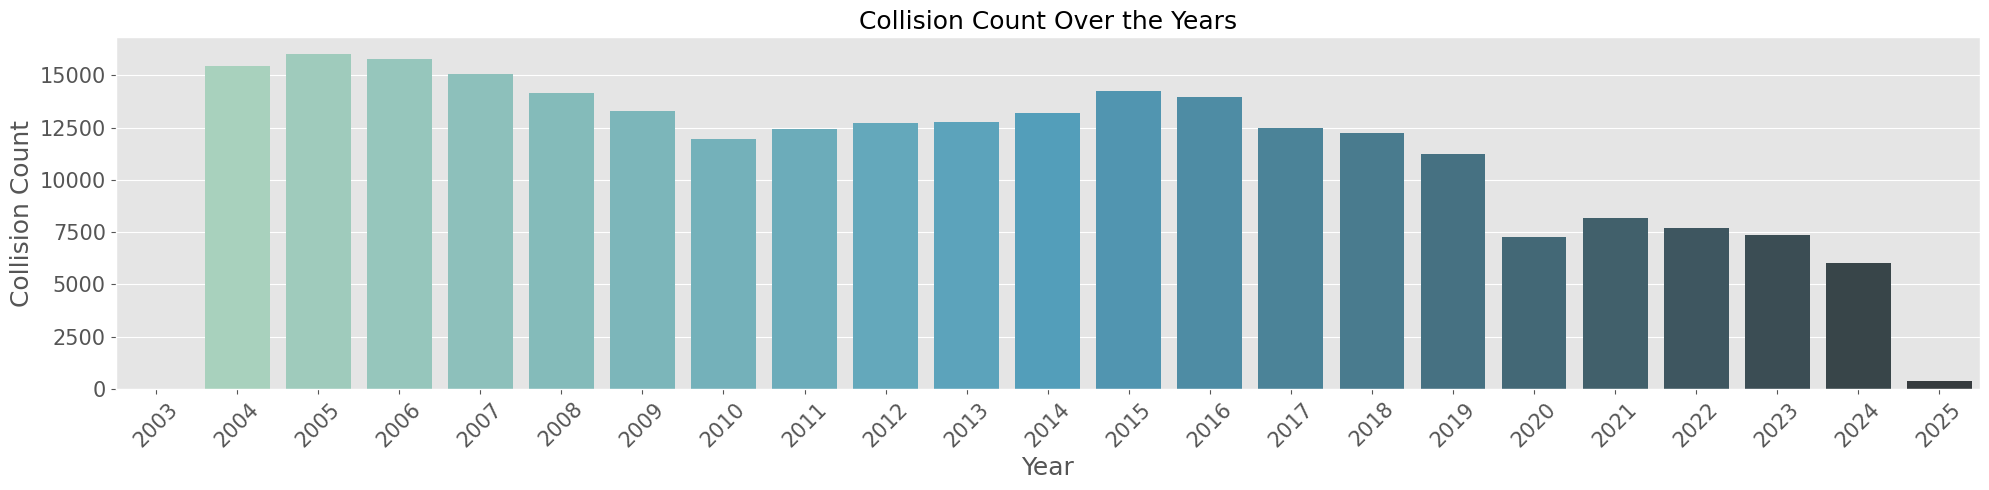

In [ ]:
# Precompute year counts
year_counts = df['Year'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))  # Reduce size for better readability
sns.barplot(x=year_counts.index, y=year_counts.values, ax=ax, palette=sns.color_palette("GnBu_d", 23))

# Labels & Title
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15, rotation=45)  # Rotate x-axis labels for clarity
ax.tick_params(axis="y", labelsize=15)
plt.title("Collision Count Over the Years", fontsize=18)

# Show plot
plt.tight_layout()
plt.show()

There is no clear trend visible. Accidents does seem to be declining yearly, but some more data is needed to state this precisely. The major dip in 2020, could be a result of covid lockdown.

### **Covid Effect**

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Assuming 'df' is your original DataFrame

# Create 'df_compare'
a = df[df['Year']!=2020].groupby(['Month'])['STCOLCODE'].count()/df[df['Year']!=2020].groupby(['Month']).size().nunique()
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns = {'STCOLCODE':'2013-2019'}, inplace=True)
b= df[df['Year']==2020].groupby(['Month'])['STCOLCODE'].count()
b = b.to_frame()
b.reset_index(inplace=True)
b.rename(columns = {'STCOLCODE':'2020'}, inplace=True)
# merging dataframes
df_compare = pd.merge(a, b, on='Month', how='left')


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_compare['Month'], y=df_compare['2013-2019'],mode='lines+markers',
                         name='Before 2020'))
fig.add_trace(go.Scatter(x=df_compare['Month'], y=df_compare['2020'],mode='lines+markers',
                        name='2020'))
fig.update_layout(title="Impact of COVID-19 on Road Accidents",
                  xaxis_title='Month',
                  yaxis_title='Average Number of Accidents'
                 )
# plt.savefig('./blog/35.png')
fig.show()

In 2020, the whole world faced a pandemic of the COVID-19 outbreak. Its effect on travel behavior has also been sudden and wide-ranging. We can see that there is a sudden drop in collision cases in 2020, due to the COVID-19 pandemic

###**Does a specific month experience more accidents?**

<ipython-input-201-967a5c38c048>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




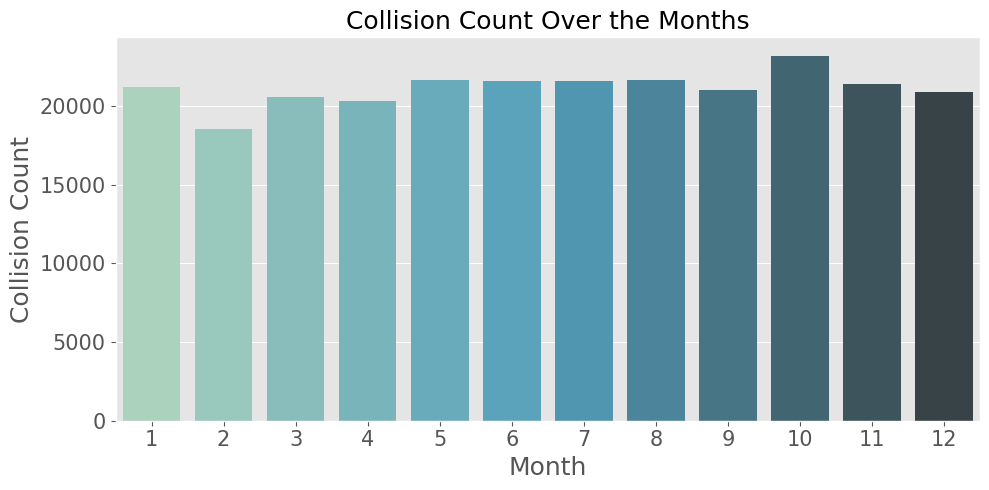

In [ ]:
# Precompute year counts
month_counts = df['Month'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))  # Reduce size for better readability
sns.barplot(x=month_counts.index, y=month_counts.values, ax=ax, palette=sns.color_palette("GnBu_d", 12))

# Labels & Title
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)  # Rotate x-axis labels for clarity
ax.tick_params(axis="y", labelsize=15)
plt.title("Collision Count Over the Months", fontsize=18)

# Show plot
plt.tight_layout()
plt.show()

There is no trend in collisions with the months.

### **Are accidents more severe in any month?**

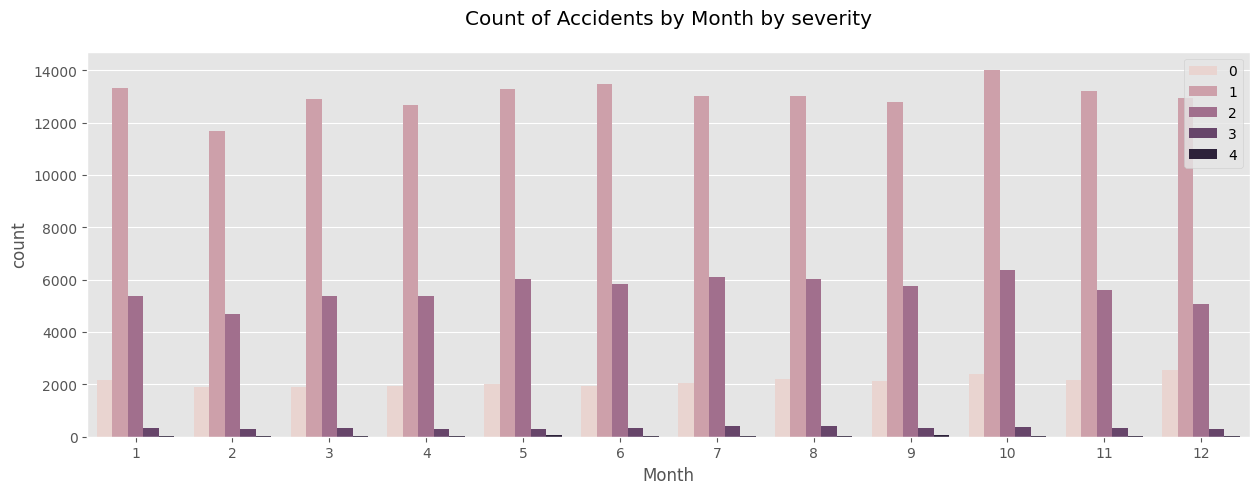

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Month', hue='SEVERITYCODE', data=df)
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Month by severity', y=1.05)
plt.show()

There's almost similar pattern that can be seen across all months.

### **Does the day of the week result in more accidents?**

<ipython-input-88-fe067e301af1>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




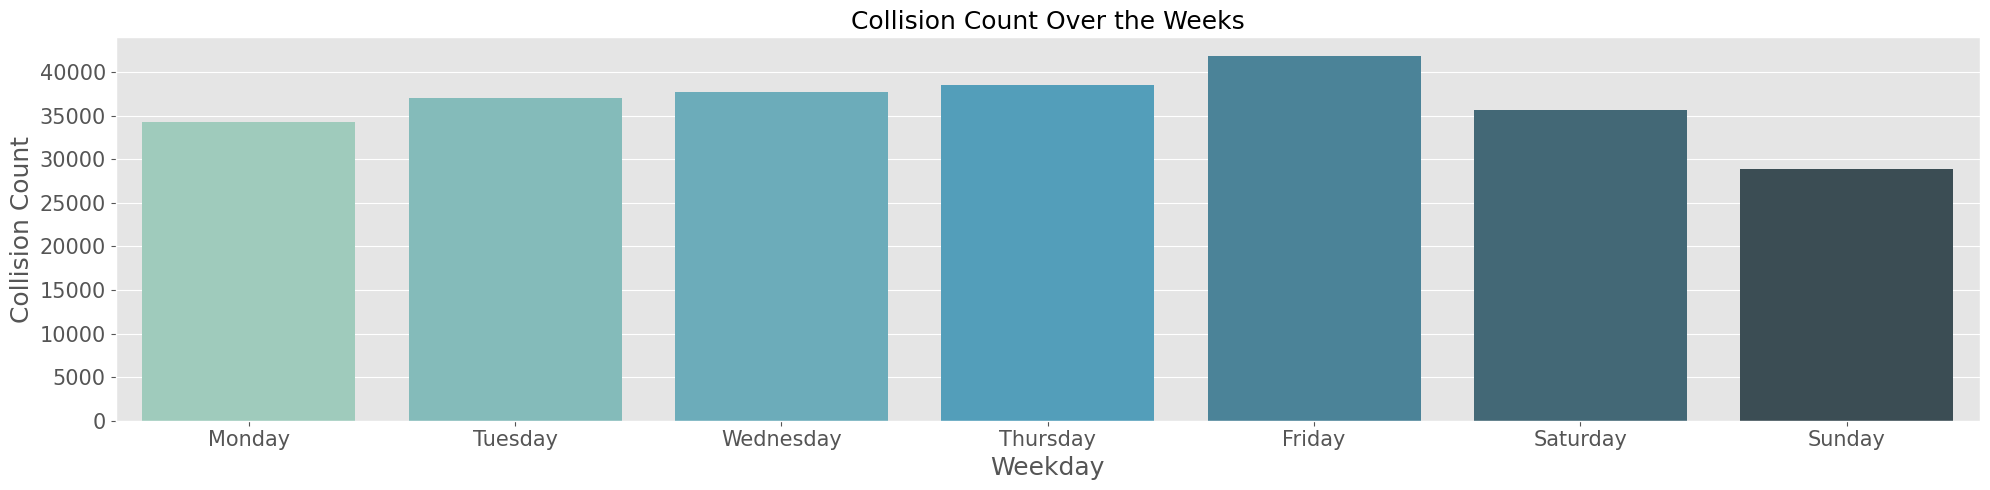

In [ ]:
# Precompute year counts
weekday_counts = df['Weekday'].value_counts().sort_index()

# Define correct order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Reorder the count data based on correct weekday order
weekday_counts = weekday_counts.reindex(weekday_order)

# Plot
fig, ax = plt.subplots(figsize=(20, 5))  # Reduce size for better readability
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=ax, palette=sns.color_palette("GnBu_d", 7))

# Labels & Title
ax.set_xlabel('Weekday', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)  # Rotate x-axis labels for clarity
ax.tick_params(axis="y", labelsize=15)
plt.title("Collision Count Over the Weeks", fontsize=18)

# Show plot
plt.tight_layout()
plt.show()

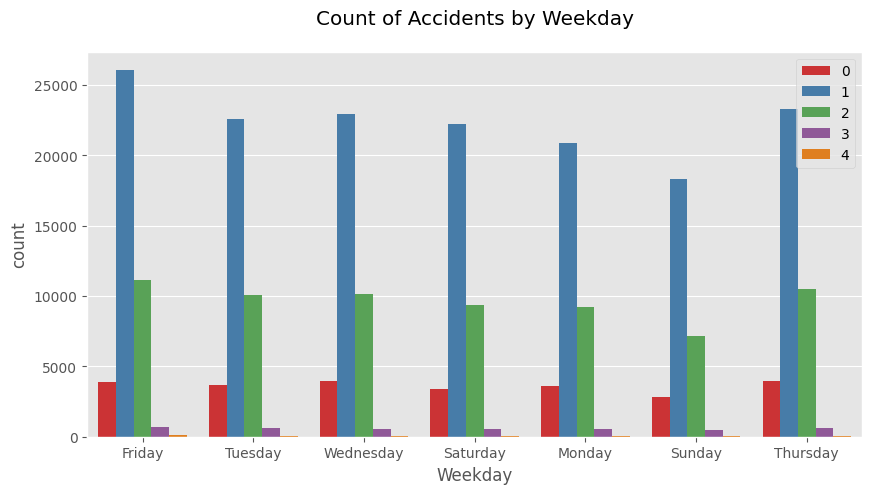

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='SEVERITYCODE', data=df, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Weekday', y=1.05)
plt.show()

Fridays generally expereince more accidents. On the other Sunday experiences less accidents. People may step out less during the weekend.

###**Is Time of the Day a factor for causing accidents?**

To analyze the data based on timestamp, it was helpful to divide the data into 6 equal time buckets.

In [ ]:
pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

,TIME
Late Night,00:00 to 04:00
Early Morning,04:00 to 08:00
Morning,08:00 to 12:00
Noon,12:00 to 16:00
Eve,16:00 to 20:00
Night,20:00 to 00:00


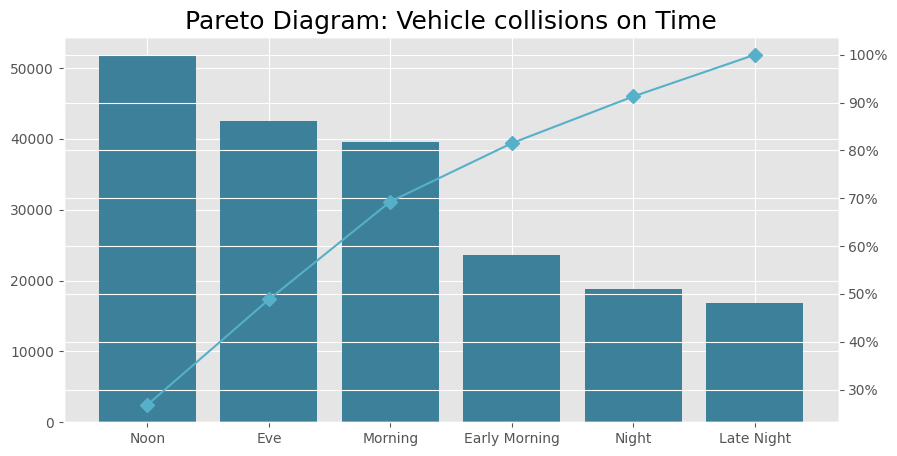

In [ ]:
df_TOD = pd.DataFrame(df['STCOLCODE'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='STCOLCODE',ascending=False)
df_TOD["cumpercentage"] = df_TOD["STCOLCODE"].cumsum()/df_TOD["STCOLCODE"].sum()*100


fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["STCOLCODE"], color="C15")
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7)
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

ax.tick_params(axis="y")
ax2.tick_params(axis="y")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)

# plt.savefig('./blog/4.png')
plt.show()

From the pareto diagram, we can see that about 50% of accidents tend to happen during the day time i.e. between 12:00 P.M. to 8:00 P.M.

### **Are accidents more severe at a certain time?**

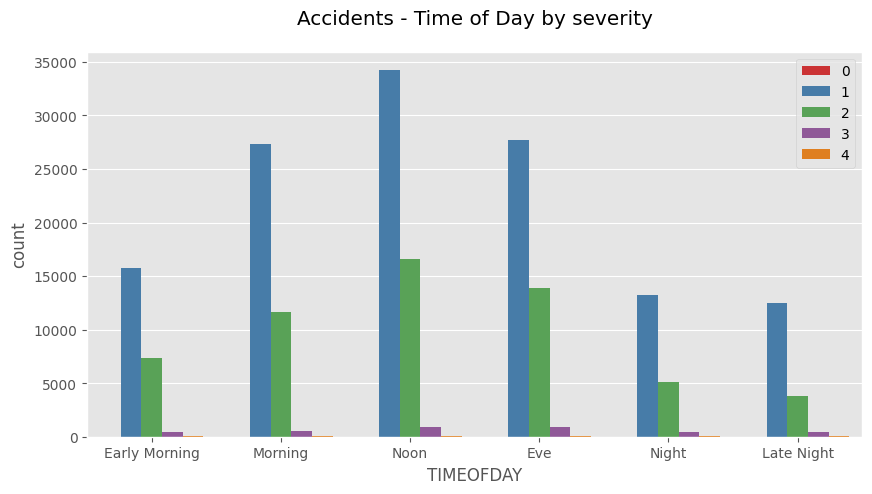

In [ ]:
plt.figure(figsize=(10,5))
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
sns.countplot(x='TIMEOFDAY', hue='SEVERITYCODE', data=df, palette="Set1", order=time_order)
plt.legend(loc='best', prop={'size': 10})
plt.title('Accidents - Time of Day by severity', y=1.05)
plt.show()

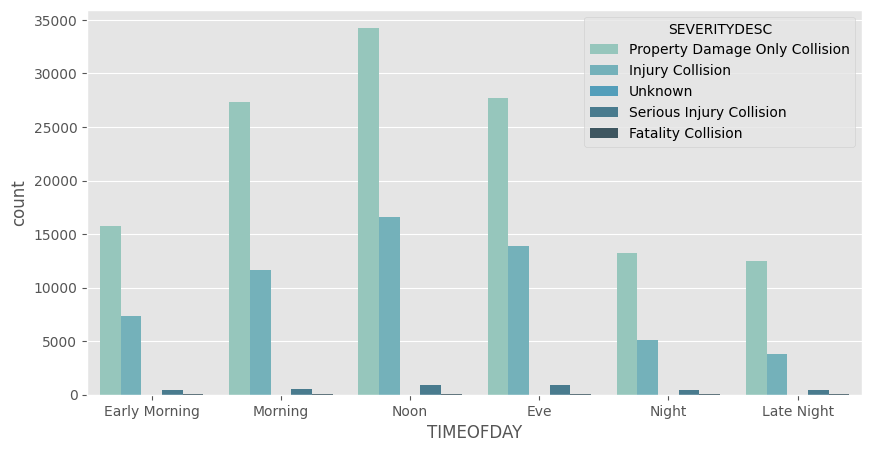

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
# Use either x or y, but not both
sns.countplot(x=df["TIMEOFDAY"], hue=df['SEVERITYDESC'], ax=ax, palette=sns.color_palette("GnBu_d", 5), order=time_order)  # Using x and hue for grouping
plt.show()

Accidents that happen at noon cause are more severe followed by evening. They constituted the most of property damage and injuries.

### **Time most accidents happen!**

<Axes: xlabel='TIMEOFDAY', ylabel='Total Accidents'>

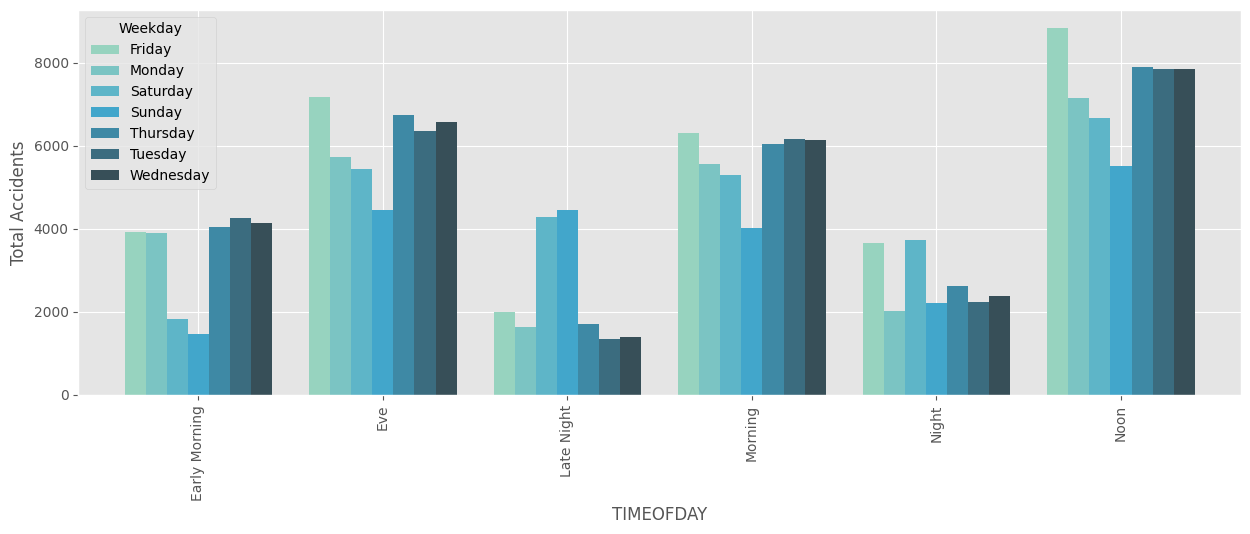

In [ ]:
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
df.groupby('TIMEOFDAY')['Weekday'].value_counts().unstack().plot(kind = 'bar', figsize = (15, 5), width = 0.8, ylabel = 'Total Accidents',color=sns.color_palette("GnBu_d",7))


Most accidents happen around Friday noon.

<ipython-input-95-6644802e465f>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



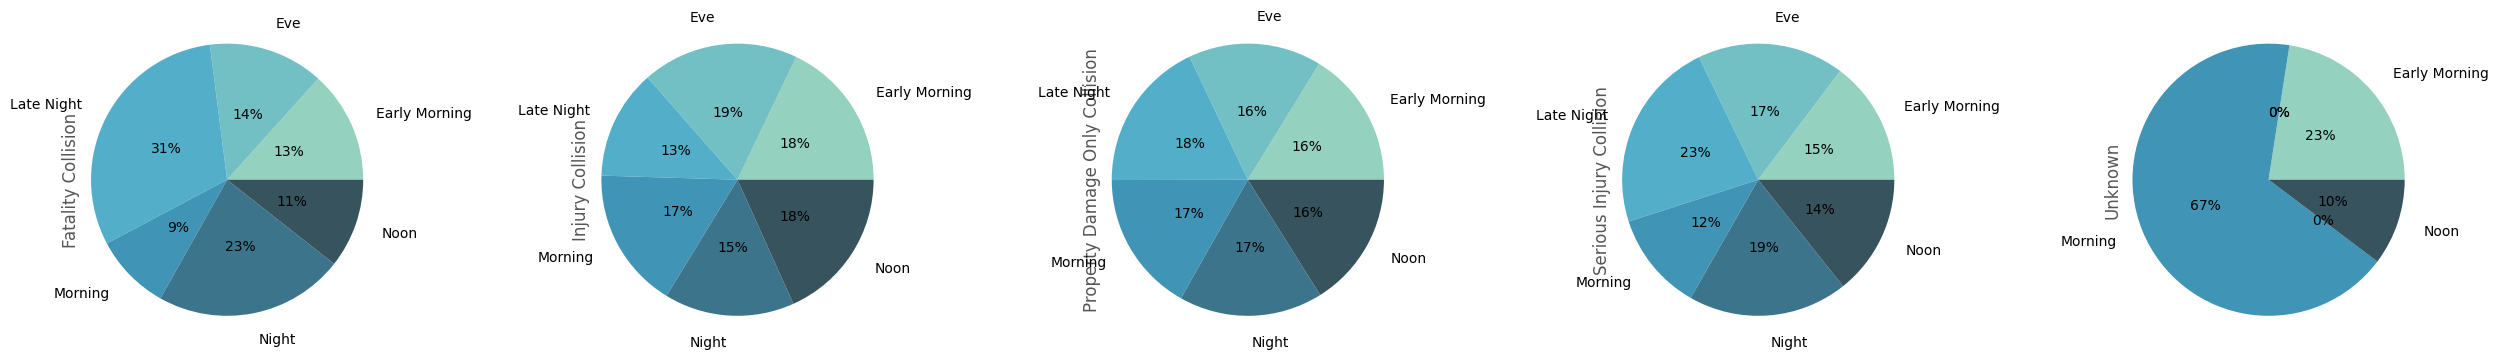

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
df_temp = df.copy()
df_temp = df_temp[df_temp["SEVERITYCODE"]!='0']
(pd.crosstab(df_temp.TIMEOFDAY, df_temp.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100).plot.pie(subplots=True, ax=ax, autopct='%1.0f%%', pctdistance=0.5,labeldistance=1.2, radius=1.2, legend=None, colors=sns.color_palette("GnBu_d", 6))
fig.subplots_adjust(wspace=0.8, hspace=0.8)

# plt.savefig('./blog/5.png')

There is no clear relation between severity of accidents and time of the day. During Late Night, cases of "Property damage only collision" incidents are higher than rest of the day percentage wise. 3 of 4 accidents happening during late night are just doing property damage.

Major fatal and serious injuries happen mostly during late night hours and higher than rest of the day.

Accidents that happen during early morning till evening has more injuries. This could be due to rush hours.

### **Count of Accidents by Severity**

In [ ]:
temp = df[["SEVERITYCODE","SEVERITYDESC"]]
temp[~(temp.duplicated())].style.hide(axis='index')

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
2,Injury Collision
0,Unknown
3,Serious Injury Collision
4,Fatality Collision


In [ ]:
df["SEVERITYCODE"].value_counts(normalize=True)*100

,proportion
SEVERITYCODE,
1,61.582061
2,26.634999
0,9.984481
3,1.607821
4,0.190638


<Axes: title={'center': 'Count of Accidents by Severity'}, xlabel='Severity Code', ylabel='Count'>

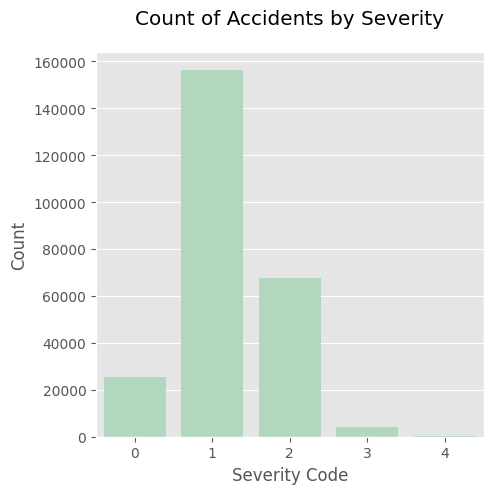

In [ ]:
countseverity = df.SEVERITYCODE.unique()
count_by_severity=[]
for i in df.SEVERITYCODE.unique():
    count_by_severity.append(df.loc[df.SEVERITYCODE == i, 'SEVERITYCODE'].count())
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Count of Accidents by Severity', y=1.05)
ax.set(xlabel='Severity Code', ylabel='Count')
sns.barplot(x=countseverity, y=count_by_severity)

We can see that 62% of accidents belong to Category 1 which is "Property Damage Only Collision"; 26% belong to Category 2, "Injury Collision"

### **Effect of Speeding**

array([<Axes: ylabel='proportion'>], dtype=object)

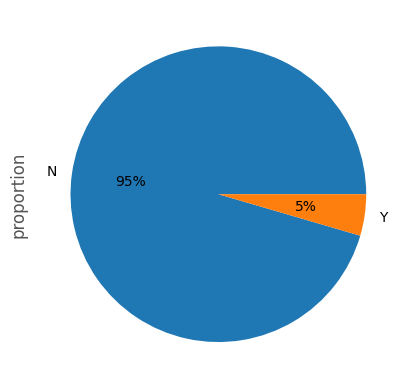

In [ ]:
sns.set_palette(sns.color_palette("tab10",10))
speed = df["SPEEDING"]
speed = speed.fillna("N")
speed.value_counts(normalize=True).plot.pie(subplots=True, autopct='%1.0f%%')
# plt.savefig('./blog/6.png')

array([<Axes: ylabel='STCOLCODE'>], dtype=object)

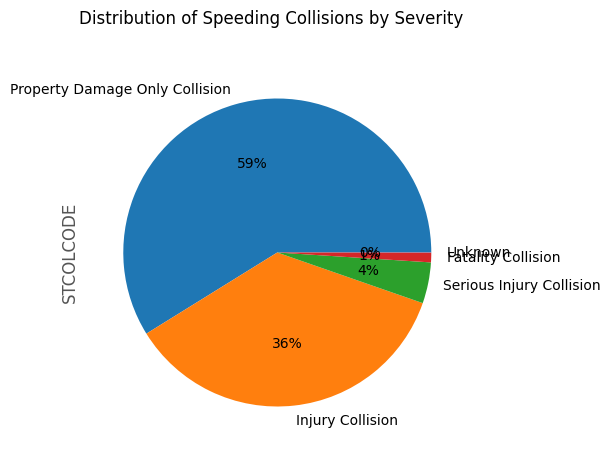

In [ ]:
((df[df["SPEEDING"]=="Y"].groupby("SEVERITYDESC")["STCOLCODE"].count().sort_values(ascending=False) / df[df["SPEEDING"]=="Y"].groupby("SEVERITYCODE")["STCOLCODE"].count().sum())*100).plot.pie(subplots=True,figsize=(5,5), autopct='%1.0f%%' , title="Distribution of Speeding Collisions by Severity")
# plt.savefig('./blog/7.png')


array([<Axes: ylabel='proportion'>], dtype=object)

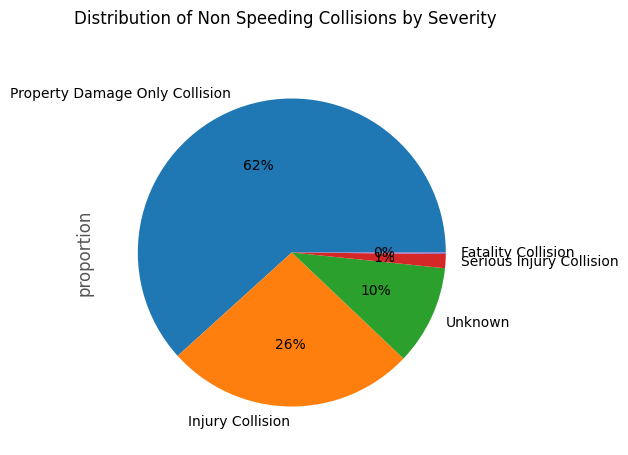

In [ ]:
(df[df["SPEEDING"]=='N']["SEVERITYDESC"].value_counts(normalize=True)*100).plot.pie(subplots=True,figsize=(5,5), autopct='%1.0f%%', title="Distribution of Non Speeding Collisions by Severity")
# plt.savefig('./blog/8.png')


Speeding thrills but definitely kills! Although just 4% of all the collision cases are because of speeding it is worth noting that the percentage of Injury collisions increases from 26.52% out of the non-speeding collisions to 36.3% in the case of speeding collisions. Similarly, Serious injury collisions increase from 1.39% to 3.92% Likewise, Fatal injury collisions increase from 0.15% to 0.89% because of speeding. While the percentage of Property Damage Only Collisions decreases from 62.14% to 58.87%It shows that indeed, speeding kills more.

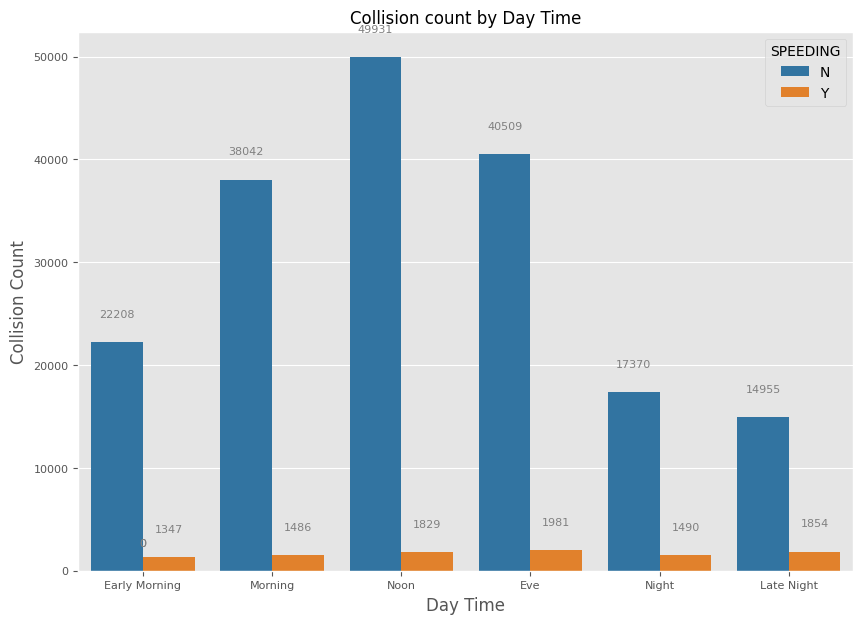

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
sns.countplot(x=df["TIMEOFDAY"], hue=df['SPEEDING'],ax=ax, order=time_order)
ax.set_xlabel('Day Time', fontsize=12)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.set_ylabel('Collision Count', fontsize=12)
plt.title("Collision count by Day Time", fontsize=12)
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='gray', xytext=(0, 20),
                 textcoords='offset points')
# plt.savefig('./blog/9.png')

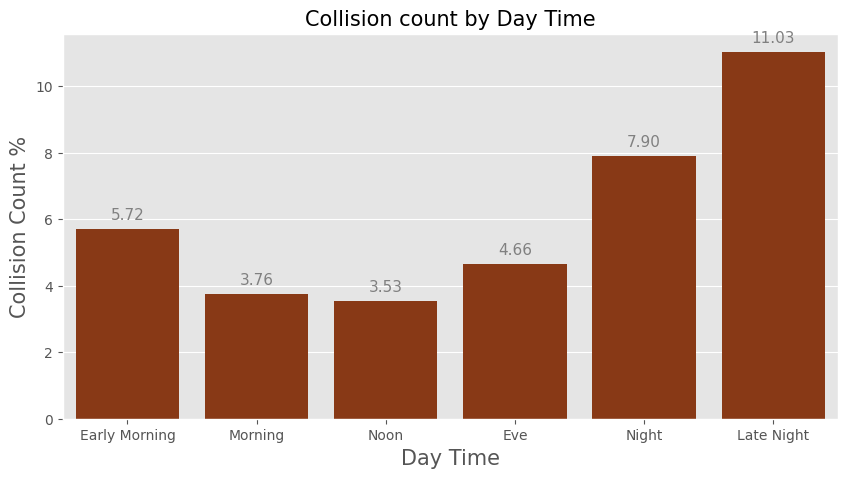

In [ ]:
sns.set_palette(sns.color_palette("Oranges_r",10))
fig, ax = plt.subplots(figsize=(10,5))
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
sns.barplot(y=(df.groupby('TIMEOFDAY')['SPEEDING'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['STCOLCODE'].count())*100, x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax, order=time_order)
ax.set_xlabel('Day Time', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Count %', fontsize=15)
plt.title("Collision count by Day Time", fontsize=15)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
# plt.savefig('./blog/10.png')


Speeding cases distributed with time shows that there are a similar number of cases in Evening, Late Night, and Noon. But percentage-wise distribution tells some different story. 11.05% of all collisions happening in late-night are because of speeding, indicating speeding collisions are more likely to occur at night due to less visibility.

### **What kind of collisions happened due to speeding?**

Text(0.5, 1.0, 'Collision type by count of Speeding collisions')

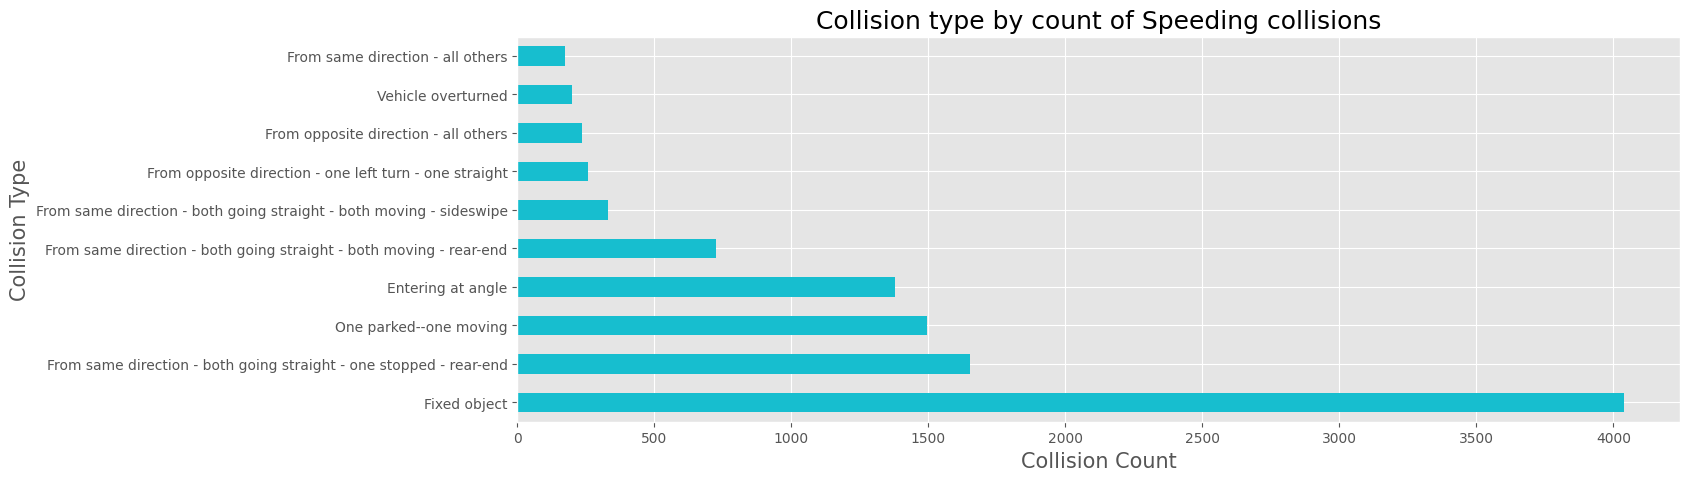

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_palette(sns.color_palette("tab10_r",10))
df[(df["SPEEDING"]=="Y")].groupby("ST_COLDESC")["STCOLCODE"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax)
ax.set_xlabel('Collision Count', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Type', fontsize=15)
plt.title("Collision type by count of Speeding collisions", fontsize=18)
# plt.savefig('./blog/11.png')

While analyzing collision type, I noticed that majority of speeding collisions are due to motor vehicles striking a fixed object or another motor vehicle from the rear end (which was expected).

### **Top Speeding Collisions Hotspot**

Text(0.5, 1.0, 'Location by count of Speeding collisions')

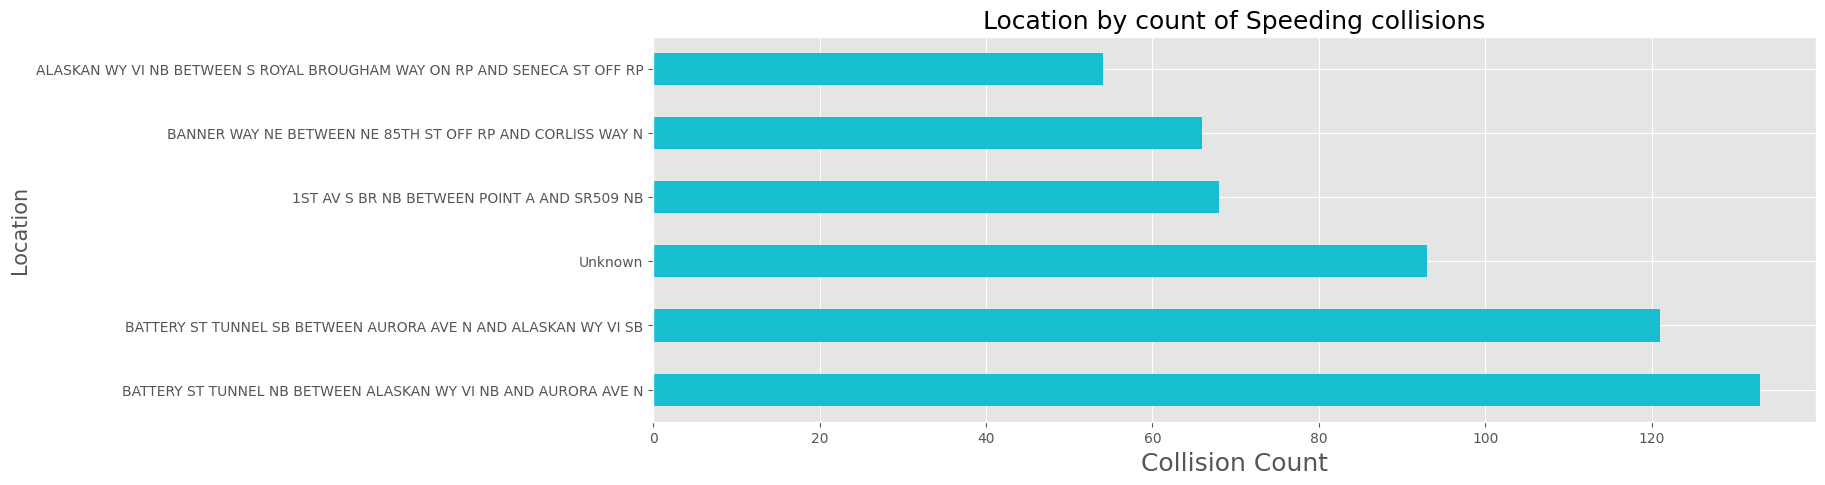

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_palette(sns.color_palette("tab10_r",10))
df[df["SPEEDING"]=="Y"].groupby("LOCATION")["STCOLCODE"].count().sort_values(ascending=False).head(6).plot.barh()
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Location', fontsize=15)
plt.title("Location by count of Speeding collisions", fontsize=18)
# plt.savefig('./blog/12.png')

In [ ]:
m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10, width=800, height=400)
folium.Marker((47.69034175,-122.3290808),popup="MOST SPEEDING COLLISIONS: BATTERY ST TUNNEL").add_to(m)
m

While analyzing speeding collision hotspots, I found “Battery Street Tunnel” to be on the top of the list. There are over 250 cases of collisions at "BATTERY ST TUNNEL"

### **Effect of inattentiveness**

Text(0.5, 1.0, 'Collision count by Day time for Inattentive driving collisions')

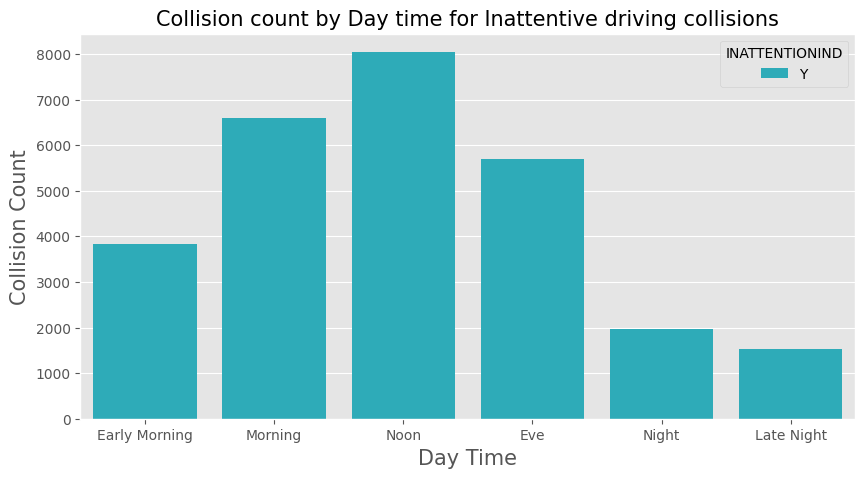

In [ ]:
# Define specific order for TIMEOFDAY
time_order = ["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"]
df_filtered = df[df["INATTENTIONIND"] == 'Y']

sns.set_palette(sns.color_palette("tab10_r",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df["TIMEOFDAY"], hue=df_filtered['INATTENTIONIND'],ax=ax, order=time_order)
ax.set_xlabel('Day Time', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Count', fontsize=15)
plt.title("Collision count by Day time for Inattentive driving collisions", fontsize=15)


Text(0.5, 1.0, '% of Collision count by Day time for Inattentive driving collisions')

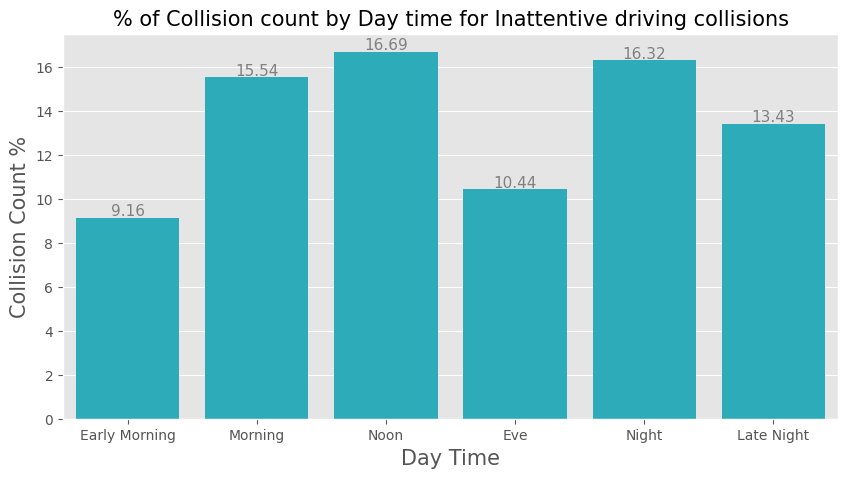

In [ ]:
sns.set_palette(sns.color_palette("tab10_r",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((df.groupby('TIMEOFDAY')['INATTENTIONIND'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['STCOLCODE'].count())*100).sort_values(), x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax, order=time_order)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Day Time', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Count %', fontsize=15)
plt.title("% of Collision count by Day time for Inattentive driving collisions", fontsize=15)
# plt.savefig('./blog/15.png')


The above data shows that ~18% of collisions happening in the morning and early morning are due to inattention of drivers.

### **What kind of collisions happen due to Inattentiveness?**

Text(0.5, 1.0, 'Collision type by count for Inattentive driving collisions')

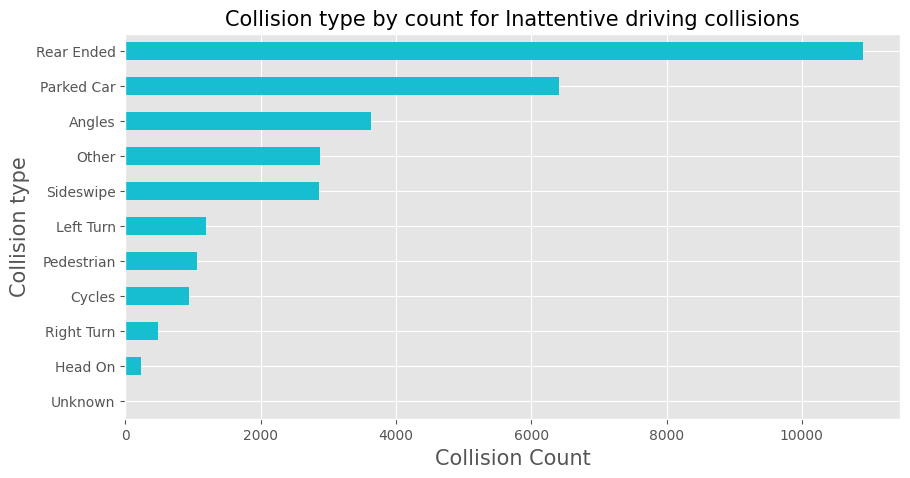

In [ ]:
sns.set_palette(sns.color_palette("tab10_r",10))
fig, ax = plt.subplots(figsize=(10,5))
(df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["STCOLCODE"].count().sort_values()).plot.barh()
ax.set_xlabel('Collision Count', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision type', fontsize=15)
plt.title("Collision type by count for Inattentive driving collisions", fontsize=15)
# plt.savefig('./blog/16.png')


In [ ]:
print((df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["STCOLCODE"].count().sort_values(ascending=False))[0]/(df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["STCOLCODE"].count().sum()) * 100)


35.63612608198595


<ipython-input-110-0116f7de0888>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



I noticed that 35% of collisions happening because of inattention are rear-ended collisions.

### **Drink and Drive Effect**

Text(0.5, 1.0, 'Collision count by Day time for under influenced driving collisions')

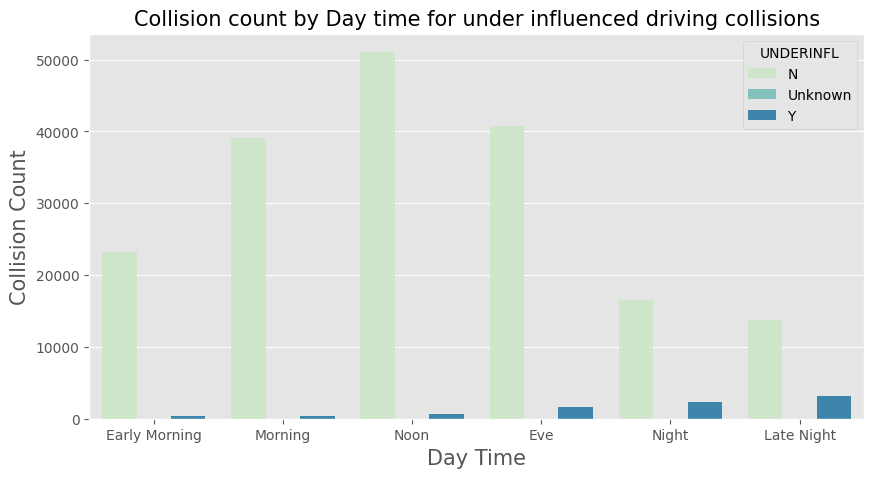

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("GnBu",3))
sns.countplot(x=df["TIMEOFDAY"], hue=df['UNDERINFL'],ax=ax, order=time_order)
ax.set_xlabel('Day Time', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Count', fontsize=15)
plt.title("Collision count by Day time for under influenced driving collisions", fontsize=15)
# plt.savefig('./blog/17.png')

In [ ]:
pd.crosstab(df.TIMEOFDAY, df.UNDERINFL).apply(lambda x: (x/x.sum())*100, axis=0)

UNDERINFL,N,Unknown,Y
TIMEOFDAY,,,
Early Morning,12.581558,0.0,3.992912
Eve,22.116489,0.0,19.822800
Late Night,7.420393,0.0,36.810396
Morning,21.218000,80.0,4.370939
Night,8.995730,0.0,26.698169
Noon,27.667830,20.0,8.304784


Alcohol/drug-influenced collisions are becoming a huge problem for metropolitans. It is quite evident from the data of total alcoholic and drug-induced collisions, ~64% of cases happen during Night and Late Night.

### **Is there a particular time where drink and drive spikes?**

Text(0.5, 1.0, 'Collision count by Month for under influenced driving collisions')

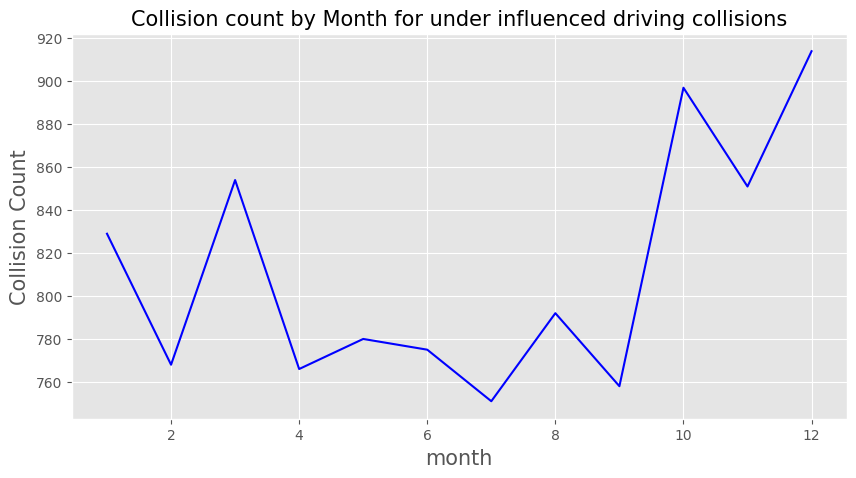

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df[df["UNDERINFL"]=="Y"].groupby("Month")["STCOLCODE"].count().plot(ax=ax,color='blue')
ax.set_xlabel('month', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Collision Count', fontsize=15)
plt.title("Collision count by Month for under influenced driving collisions", fontsize=15)
# plt.savefig('./blog/19.png')

We can see there are relatively more cases of alcoholic and drug-influenced collision during December (Probably because of the holiday season)

### **Underinfluence Hotspot Collision Location**

Text(0.5, 1.0, 'Location by Collision count for under influenced driving collisions')

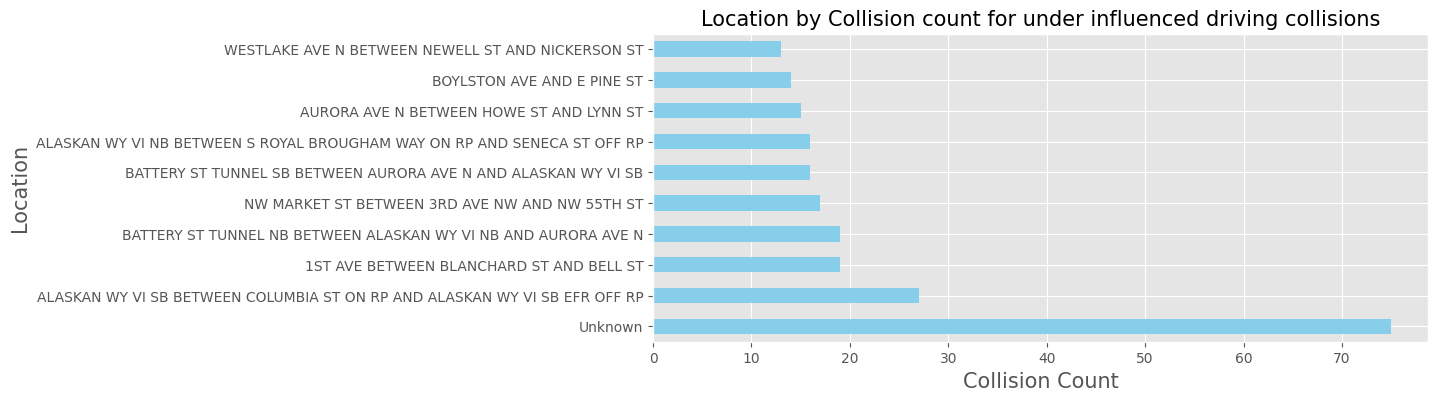

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
df[df["UNDERINFL"]=="Y"].groupby("LOCATION")["STCOLCODE"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax, color="Skyblue")
ax.set_xlabel('Collision Count', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylabel('Location', fontsize=15)
plt.title("Location by Collision count for under influenced driving collisions", fontsize=15)
# plt.savefig('./blog/20.png')

ALASKAN VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP has the greatest number of cases of under influence collisions

### **Collision Types Analysis**

**Count of Accidents by Collision Type**

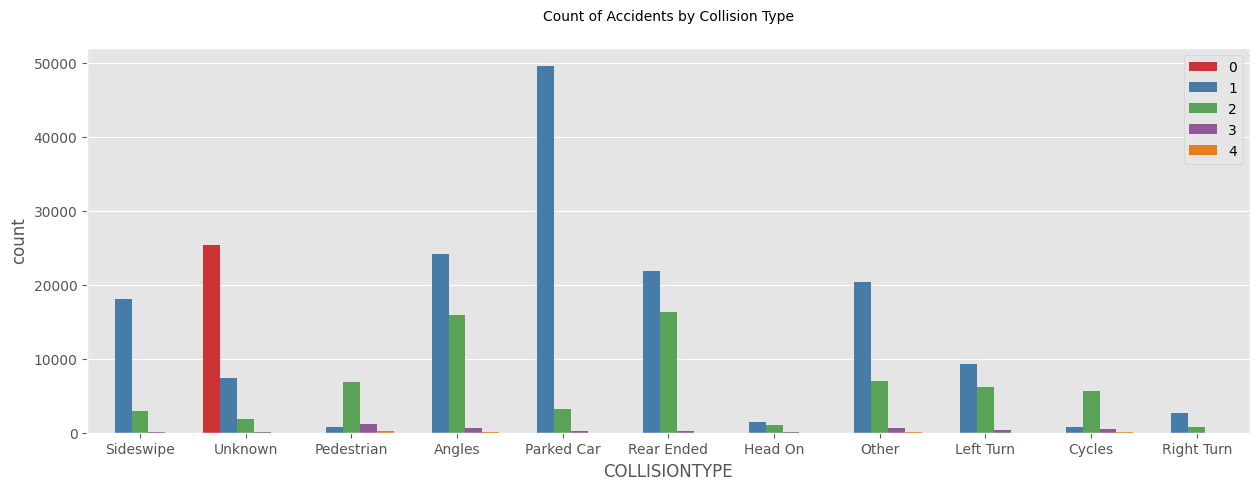

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Collision Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 10})
plt.show()

Ofcourse a lot of damage occurs to parked cars. Injuries often happen at angles and rear ended collisions.

Collision type is further bifurcated by the SDOT collision code. It is a unique code that describes how the collision occurred.

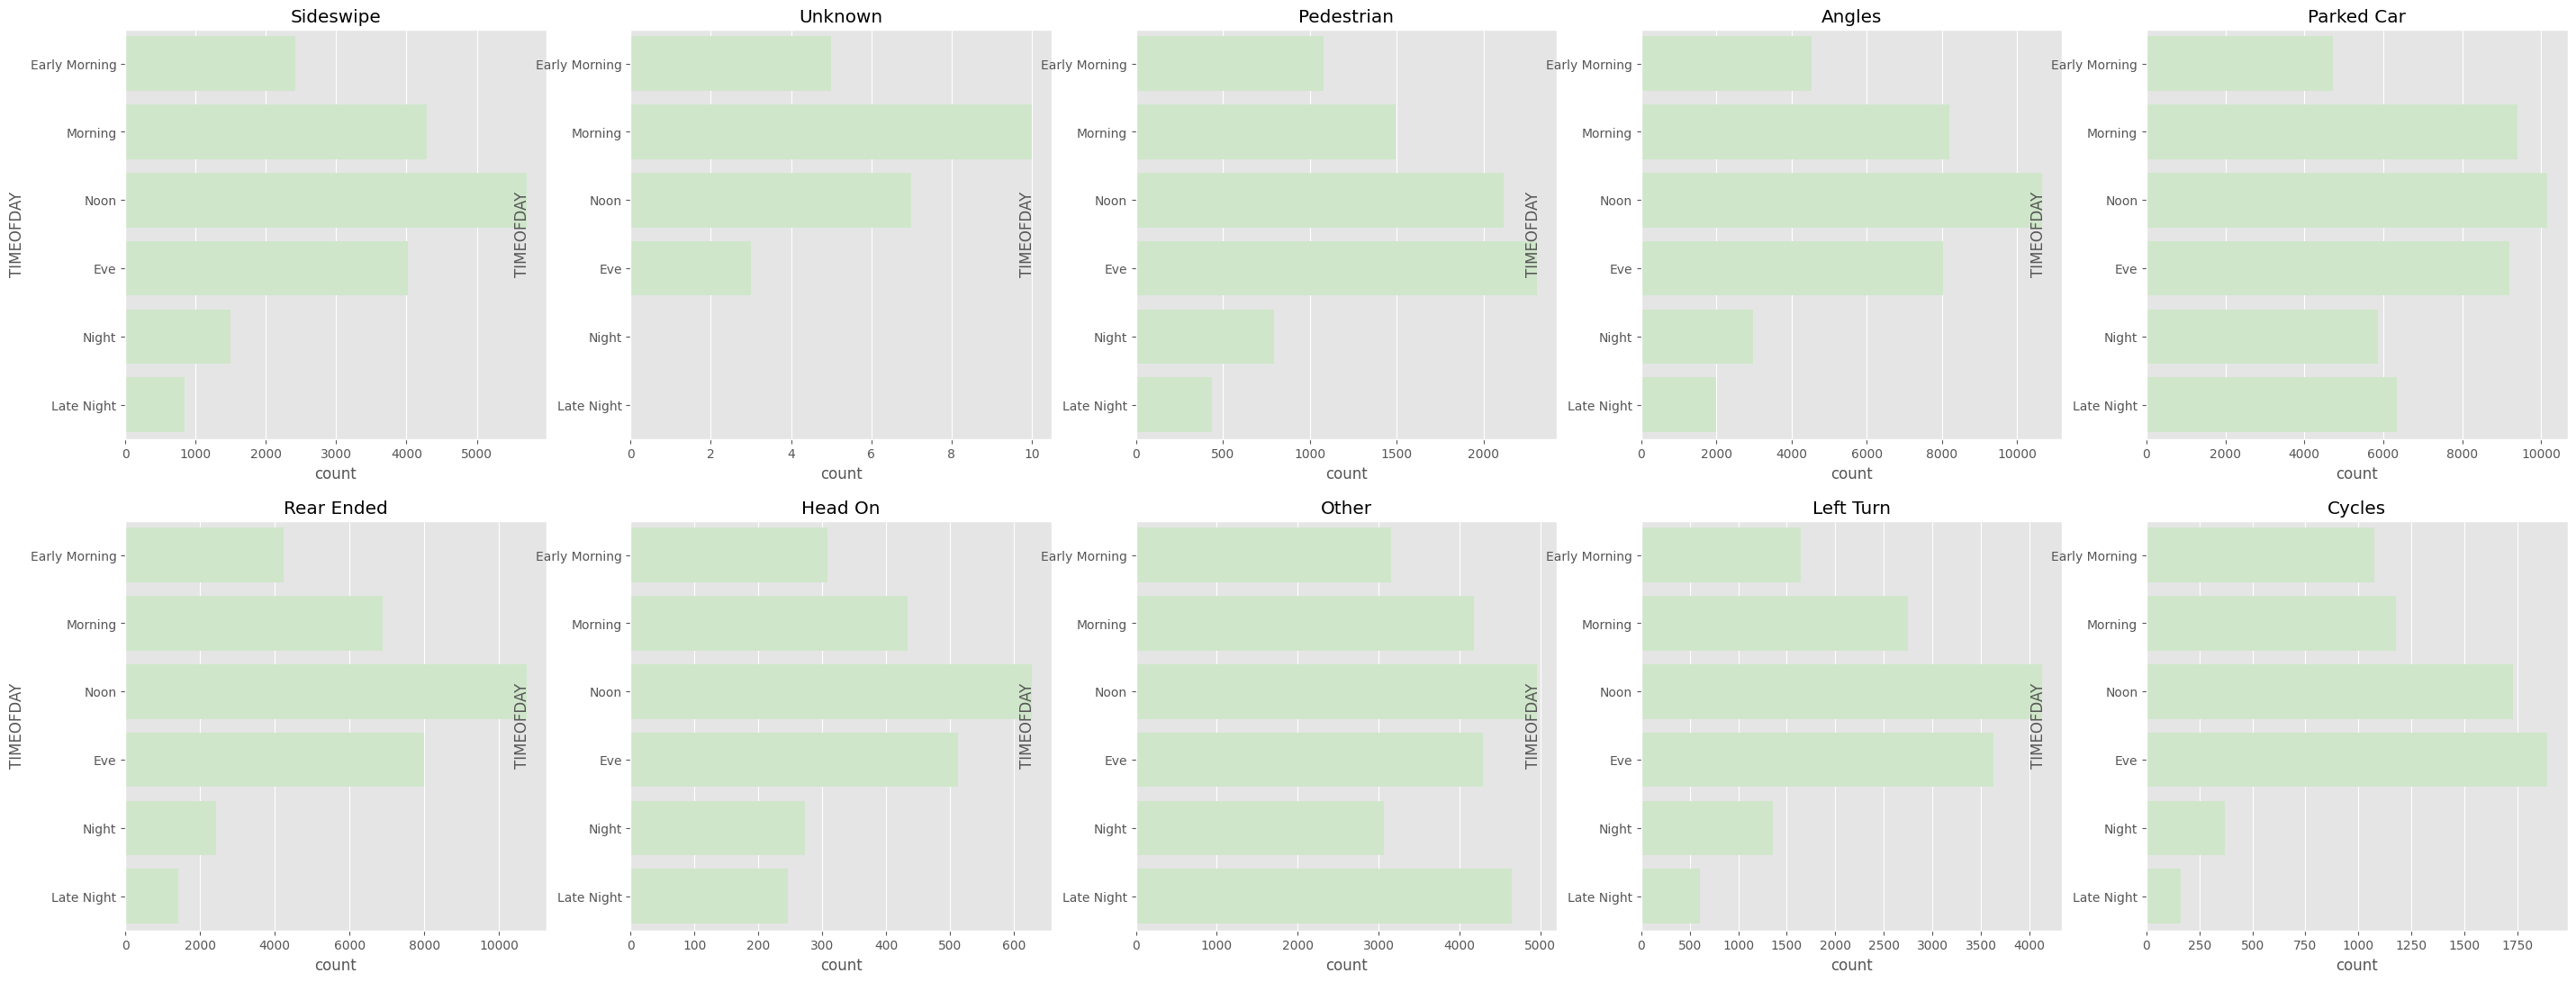

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(35,13))
sns.set_palette(sns.color_palette("GnBu_d",5))
col_type = list(df['COLLISIONTYPE'].unique())
#(col_type).remove(np.nan)
col_type1 = [x for x in col_type if x == x]  # np.nan != np.nan, so it is filtered out

for i in range(0,2):
    for j in range(0,5):
        sns.countplot(df[df['COLLISIONTYPE'] == col_type1[0]]['TIMEOFDAY'], ax=ax[i,j], order=time_order)
        ax[i,j].set_title(col_type1[0])
        col_type1.pop(0)

In [ ]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: (r/r.sum())*100, axis=0)

TIMEOFDAY,Early Morning,Eve,Late Night,Morning,Night,Noon
COLLISIONTYPE,,,,,,
Angles,19.223095,18.912685,11.844845,20.744789,15.726405,20.602782
Cycles,4.568032,4.457519,0.963769,2.985226,1.956522,3.344281
Head On,1.307578,1.207343,1.463502,1.097956,1.447508,1.213292
Left Turn,6.987901,8.536126,3.623059,6.944444,7.179215,7.984930
Other,13.402675,10.108261,27.681599,10.574782,16.235419,9.580757
Parked Car,20.080662,21.666274,37.771432,23.760372,31.108165,19.632921
Pedestrian,4.576523,5.429513,2.587899,3.784659,4.204666,4.091963
Rear Ended,18.021651,18.820899,8.406211,17.433212,12.826087,20.728362
Right Turn,1.536829,1.407390,0.624665,1.811374,1.367975,1.787094


People are more likely to hit Parked cars during Night. Motor vehicles tend to hit fixed objects more during late night-time, again a cause of low visibility.

### **Most observed collision types**

<Axes: xlabel='count', ylabel='SDOT_COLDESC'>

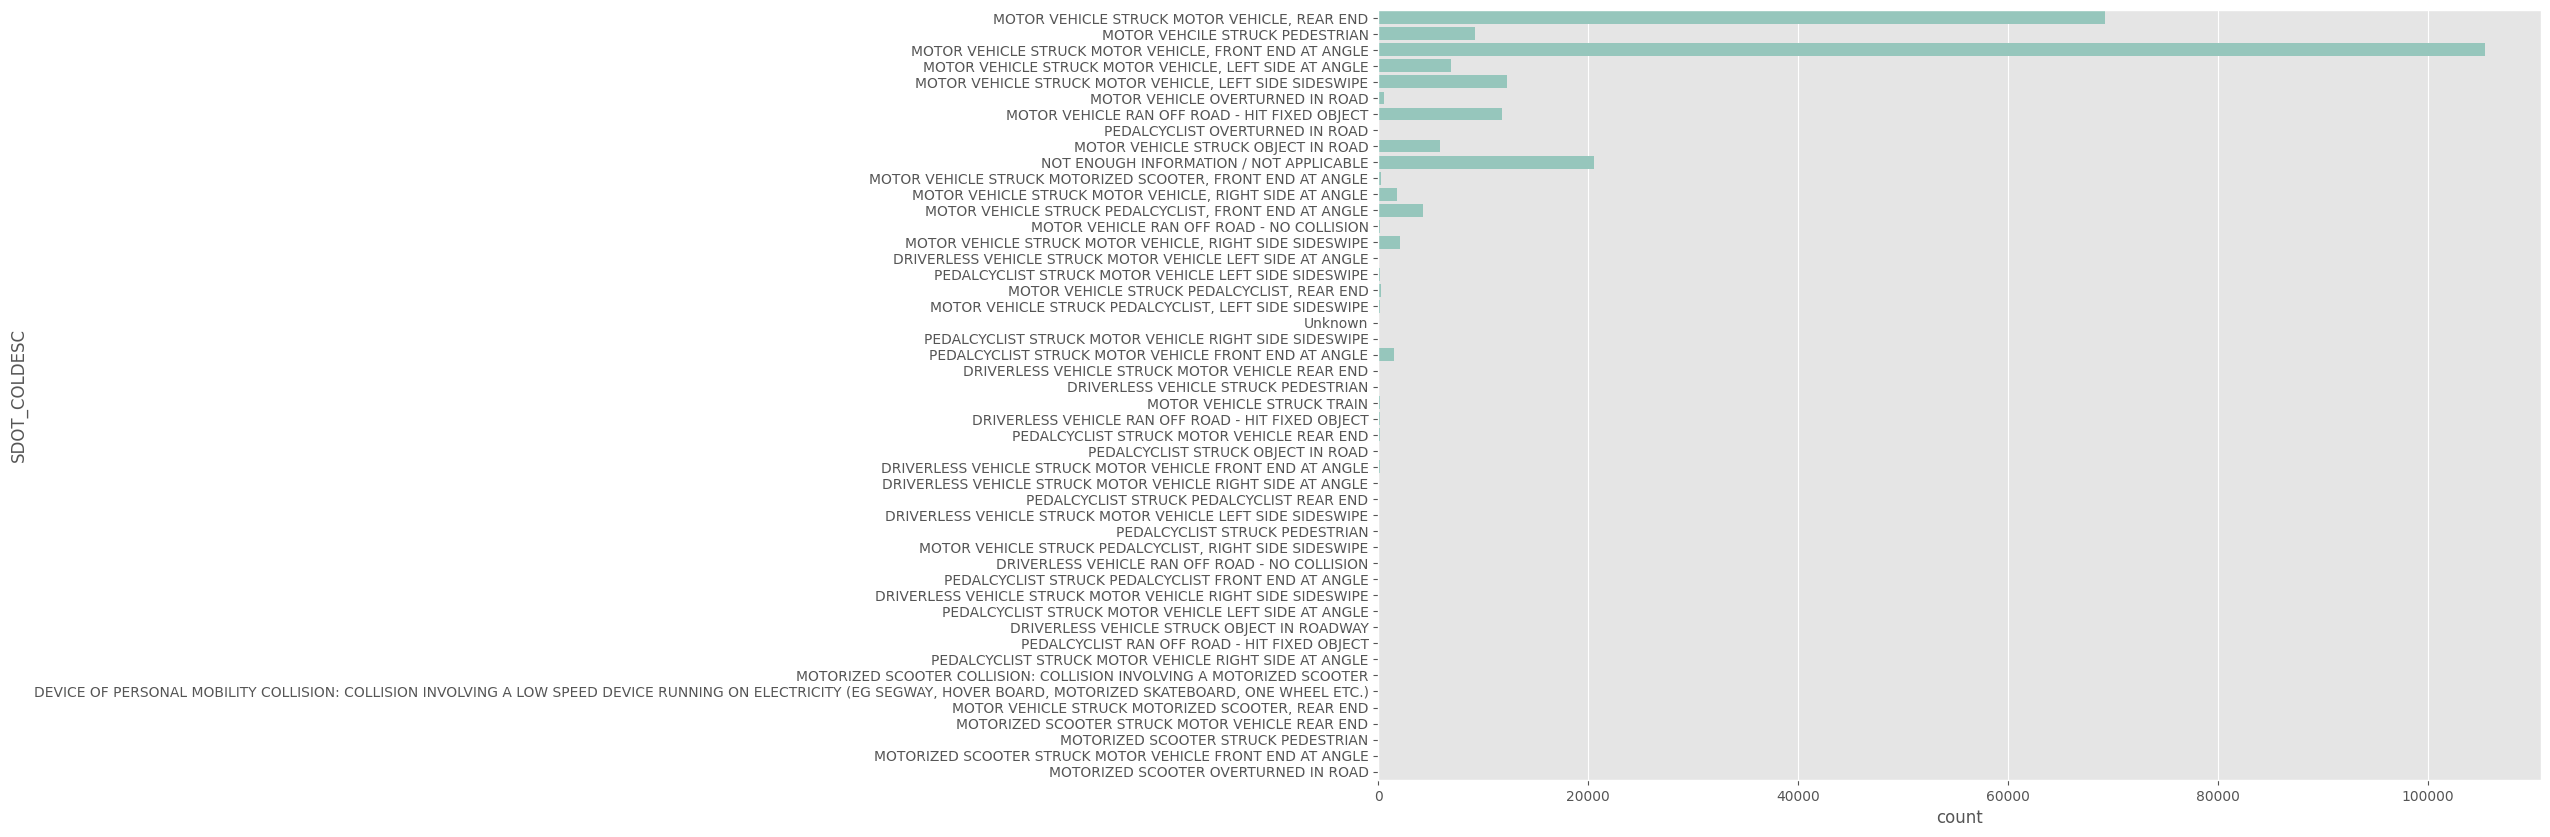

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y=df['SDOT_COLDESC'],ax=ax,orient="h")

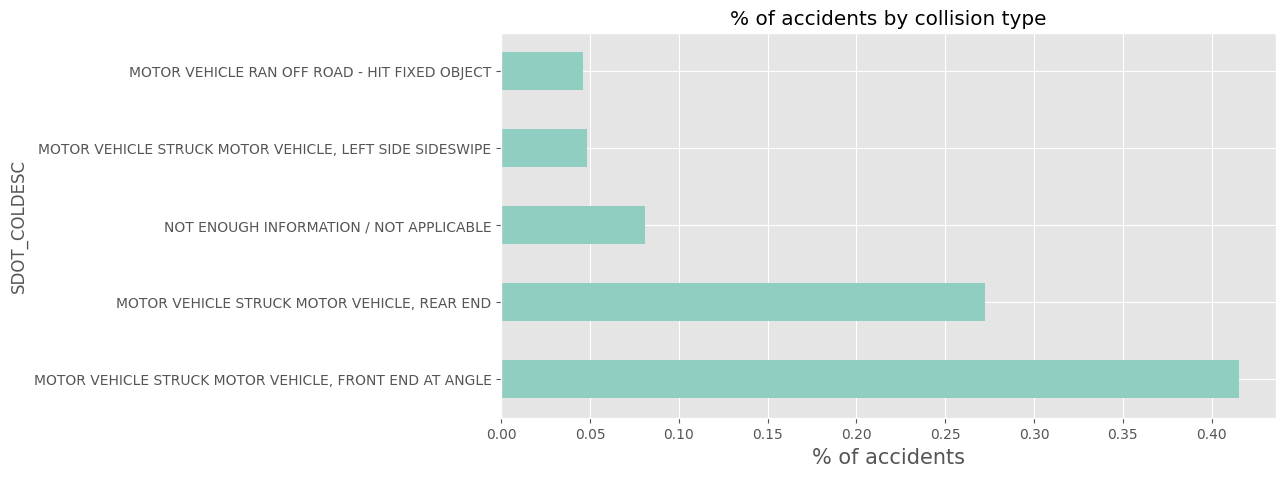

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['SDOT_COLDESC'].value_counts(normalize=True).head(5).plot.barh(title="% of accidents by collision type",ax=ax)
ax.set_xlabel('% of accidents', fontsize=15)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
# ax.set_ylabel('Collision Count', fontsize=15)
# plt.title("Collision count by Month for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/26.png')

We can see ~40% of collisions are of a motor vehicle striking another motor vehicle’s front end at an angle.

In [ ]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: ((r/r.sum())*100).round(2), axis=1)

TIMEOFDAY,Early Morning,Eve,Late Night,Morning,Night,Noon
COLLISIONTYPE,,,,,,
Angles,12.44,22.09,5.47,22.54,8.15,29.31
Cycles,16.78,29.54,2.53,18.40,5.75,27.00
Head On,12.82,21.36,10.24,18.07,11.37,26.14
Left Turn,11.66,25.70,4.31,19.45,9.59,29.28
Other,12.99,17.67,19.14,17.20,12.60,20.40
Parked Car,10.35,20.14,13.89,20.55,12.84,22.23
Pedestrian,13.10,28.04,5.29,18.18,9.64,25.74
Rear Ended,12.60,23.73,4.19,20.45,7.18,31.84
Right Turn,12.21,20.18,3.54,24.16,8.70,31.21


### **What is more risky, turning left or right?**

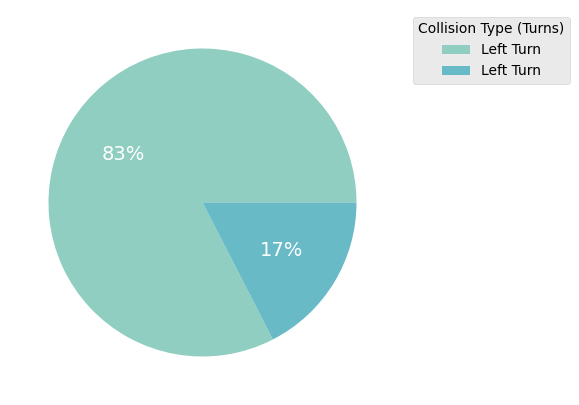

In [ ]:
sns.set_palette(sns.color_palette("GnBu_d",5))
tempdf = df[(df["COLLISIONTYPE"]=="Left Turn")|(df["COLLISIONTYPE"]=="Right Turn")]
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(tempdf["COLLISIONTYPE"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.0f%%')

ax.legend(tempdf["COLLISIONTYPE"],
          title="Collision Type (Turns)",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/24.png')
plt.show()

In [ ]:
((df[df["COLLISIONTYPE"]=="Left Turn"]["STCOLCODE"].count() - df[df["COLLISIONTYPE"]=="Right Turn"]["STCOLCODE"].count()) / df[(df["COLLISIONTYPE"]=="Right Turn")|(df["COLLISIONTYPE"]=="Left Turn")]["STCOLCODE"].count()) * 100

np.float64(65.11881857417711)

During this analysis, an inetersting fact was discovered. There is ~65% more chance to encounter a collision while taking a Left turn than taking a Right turn. This stat indicates that people are more complacent while taking a left turn than taking a right turn. This might be because in a right turn mostly they cross a lane at the intersection to reach the other side, thus requiring more attention.

In [ ]:
df[df["COLLISIONTYPE"]=="Left Turn"].groupby("ADDRTYPE")["STCOLCODE"].count()

,STCOLCODE
ADDRTYPE,
Alley,1
Block,2526
Intersection,13319
Unknown,31


In [ ]:
df[df["COLLISIONTYPE"]=="Right Turn"].groupby("ADDRTYPE")["STCOLCODE"].count()

,STCOLCODE
ADDRTYPE,
Block,1391
Intersection,1947
Unknown,16


### **Late Night Collision DIstribution**

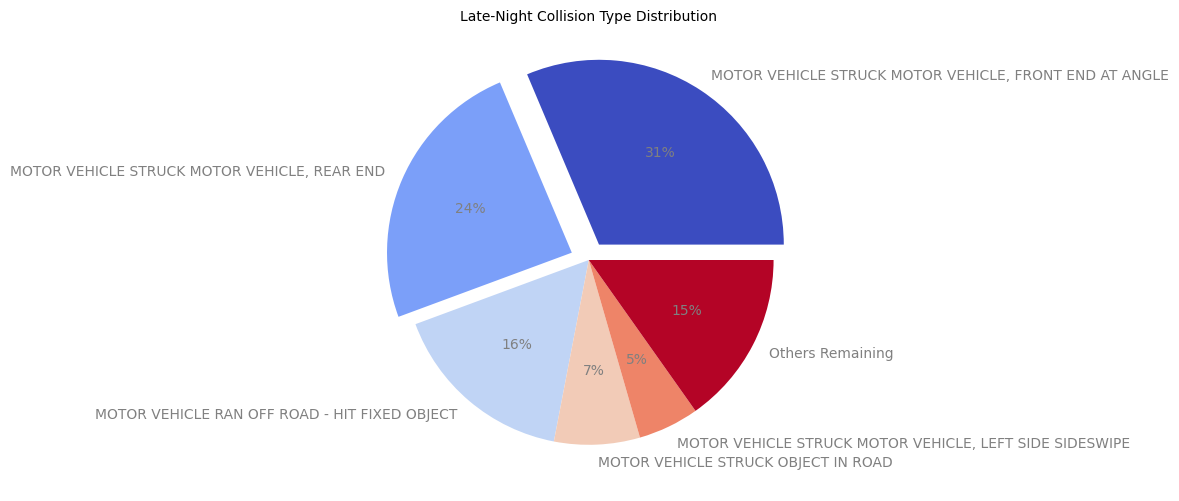

In [ ]:
# Filter dataset for late-night collisions
late_night_df = df[(df["TIMEOFDAY"] == "Late Night")]

# Count collision types
collision_counts = late_night_df["SDOT_COLDESC"].value_counts()

# Limit to top 5 categories & group others
top_n = 5
if len(collision_counts) > top_n:
    top_categories = collision_counts.nlargest(top_n)
    others_count = collision_counts.iloc[top_n:].sum()
    collision_counts = pd.concat([top_categories,pd.Series(others_count, index=["Others Remaining"])])

# Check if there are any collisions in the dataset
if collision_counts.empty:
    print("No late-night collision data available.")
else:
    # Plot Pie Chart
    fig, ax = plt.subplots(figsize=(10, 6))
    explode = [0.1 if i < 2 else 0 for i in range(len(collision_counts))]  # Slightly separate top 2 categories

    collision_counts.plot(
        kind="pie",
        autopct="%1.0f%%",
        textprops={"color": "grey", "fontsize": 10},
        explode=explode,
        ax=ax,
        legend=False,
        colormap="coolwarm"  # Use a color palette
    )

    # Set background color and title
    ax.set_facecolor("white")
    plt.title("Late-Night Collision Type Distribution", fontsize=10)

    # Show plot
    plt.show()

### **Location-based analysis**

In [ ]:
f_df = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df['INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df['SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df['ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['STCOLCODE']].count()
f_df = f_df.reset_index()
f_df

,ADDRTYPE,FATALITIES,INJURIES,SERIOUSINJURIES,ACDNTCOUNT
0,Alley,1,111,6,950
1,Block,299,48171,2166,163819
2,Intersection,211,46735,2180,85134
3,Unknown,0,250,3,3981


([0, 1, 2, 3],
 [Text(0, 0, 'Alley'),
  Text(1, 0, 'Block'),
  Text(2, 0, 'Intersection'),
  Text(3, 0, 'Unknown')])

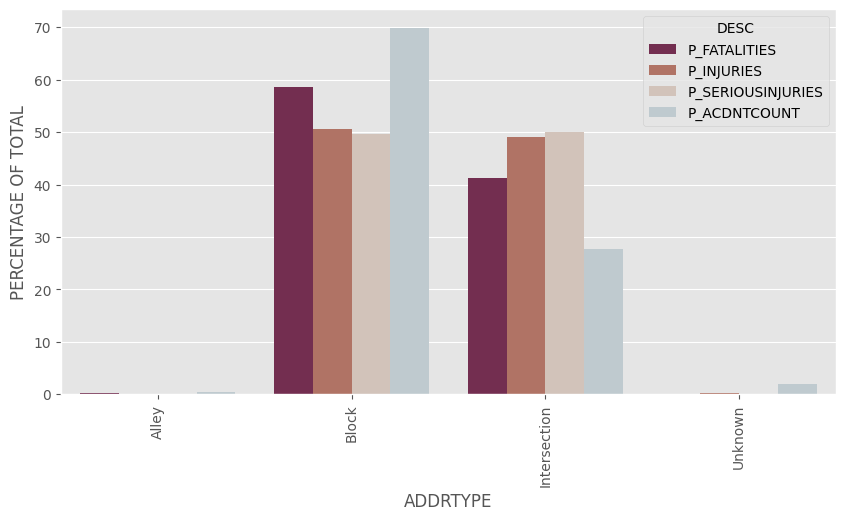

In [ ]:
sns.set_palette('twilight_shifted_r')
a = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['STCOLCODE']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
#f_df1 = f_df1.drop(columns=['FATALITIES', 'INJURIES'])
f_df1.reset_index(inplace=True)
f_df1.rename(columns={'FATALITIES':'P_FATALITIES'}, inplace=True)
f_df1

fig, ax = plt.subplots(figsize=(10,5))
df2=pd.melt(f_df1,id_vars=['ADDRTYPE'],var_name='DESC', value_name='PERCENTAGE OF TOTAL')
df2
sns.barplot(x='ADDRTYPE', y='PERCENTAGE OF TOTAL', hue='DESC', data=df2, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./blog/29.png')

In [ ]:
layout = go.Layout(
    title="Location wise Type of Injuries",
    xaxis=dict(
        title="ACCIDENT ADDRESS TYPE",
        linecolor='#A9A9A9',
        showgrid=True),
    yaxis=dict(
        title="NUMBER OF ACCIDENTS",
        showgrid=False),
    barmode='group'
)

fig = go.Figure(data=[
    go.Bar(name='TOTAL #OF ACCIDENT', x=f_df['ADDRTYPE'], y=f_df['ACDNTCOUNT']),
    go.Bar(name='INJURIES', x=f_df['ADDRTYPE'], y=f_df['INJURIES']),
    go.Bar(name='SERIOUSINJURIES', x=f_df['ADDRTYPE'], y=f_df['SERIOUSINJURIES']),
    go.Bar(name='FATALITIES', x=f_df['ADDRTYPE'], y=f_df['FATALITIES'])

], layout= layout)
fig.show()


In [ ]:
pd.crosstab(df["COLLISIONTYPE"],df["ADDRTYPE"])

ADDRTYPE,Alley,Block,Intersection,Unknown
COLLISIONTYPE,,,,
Angles,62,6634,33911,67
Cycles,9,2883,4113,5
Head On,5,2027,598,7
Left Turn,1,2526,13319,31
Other,308,22672,4945,188
Parked Car,342,49824,1602,1155
Pedestrian,49,2756,6238,7
Rear Ended,11,32642,5462,249
Right Turn,0,1391,1947,16


Collision at Blocks and Intersections are more common than in Alley.


### **Collision Hotspots**

In [ ]:
# Filter data for Year > 2016 and remove unknown locations
df1 = df[(df['Year'] > 2015) & (df['LOCATION'] != 'Unknown')]

# Group by 'LOCATION' and count the number of accidents
a = df1.groupby(['LOCATION'])['STCOLCODE'].count()

a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns={'STCOLCODE':'# OF ACCIDENTS'}, inplace=True)
bins = [0, 10, 20, 30, 40,50,120]
labels = ['Below 10', 'Between 10 and 20','Between 20 and 30','Between 30 and 40','Between 40 and 50',
         'Above 50']
a['BINNED'] = pd.cut(a['# OF ACCIDENTS'], bins, labels=labels)
a = a.sort_values(by=['# OF ACCIDENTS'],ascending=False)
b = a.head(20)
fig = px.bar(b, x="# OF ACCIDENTS", y="LOCATION", color="# OF ACCIDENTS")
fig.show()

Location "Aurora Ave N Between N 130th ST and N 135th ST" has high number of collisions since 2015.

### **Effect of Weather, Road and Lighting Conditions**

<Axes: xlabel='count', ylabel='LIGHTCOND'>

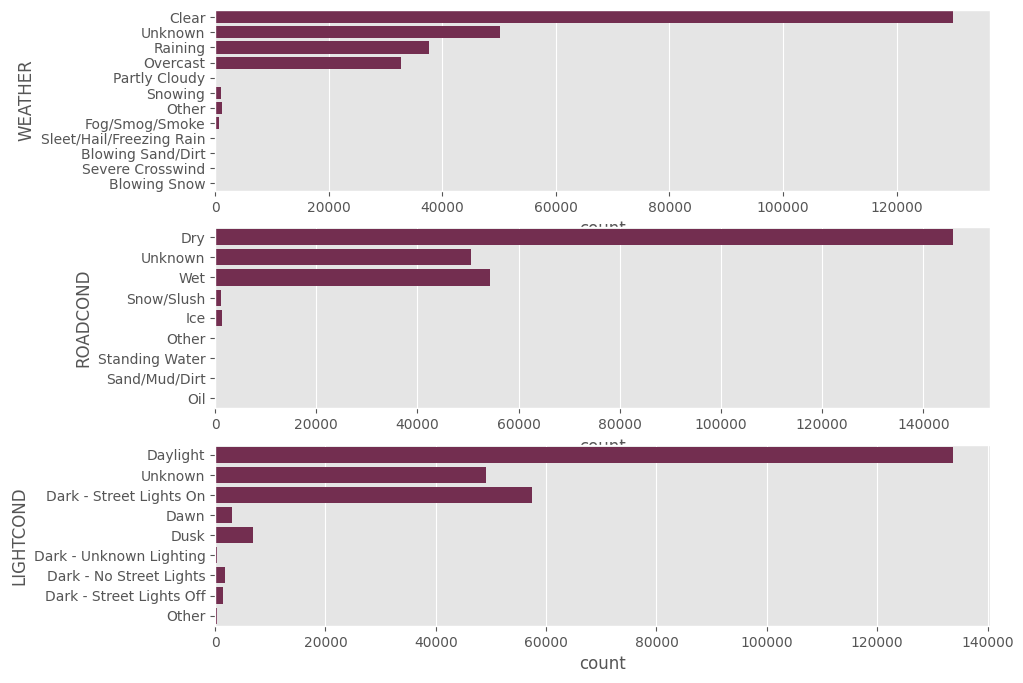

In [ ]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,8))
sns.set_palette('twilight_shifted_r')
sns.countplot(y=df['WEATHER'], ax=ax[0],orient="h")
sns.countplot(y=df['ROADCOND'], ax=ax[1],orient="h")
sns.countplot(y=df['LIGHTCOND'], ax=ax[2],orient="h")
# plt.savefig('./blog/33.png')

From the data on-road and light conditions where the collision happened, we can see that majority of collisions happened at dry roads and in daylight. I checked for the severity of these conditions.

In [ ]:
df["LIGHTCOND"].unique()

array(['Daylight', 'Unknown', 'Dark - Street Lights On', 'Dawn', 'Dusk',
       'Dark - Unknown Lighting', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Other'], dtype=object)

In [ ]:
df["SEVERITYCODE"].unique()

array([1, 2, 0, 3, 4])

In [ ]:
df[(df["SEVERITYCODE"]==1)]["LIGHTCOND"].value_counts()

,count
LIGHTCOND,
Daylight,87155
Dark - Street Lights On,38998
Unknown,20951
Dusk,4469
Dawn,1980
Dark - No Street Lights,1375
Dark - Street Lights Off,978
Dark - Unknown Lighting,236
Other,205


In [ ]:
df[(df["SEVERITYCODE"]==1)]["WEATHER"].value_counts()

,count
WEATHER,
Clear,85594
Raining,24418
Overcast,21865
Unknown,21841
Other,1060
Snowing,848
Fog/Smog/Smoke,486
Sleet/Hail/Freezing Rain,117
Partly Cloudy,54


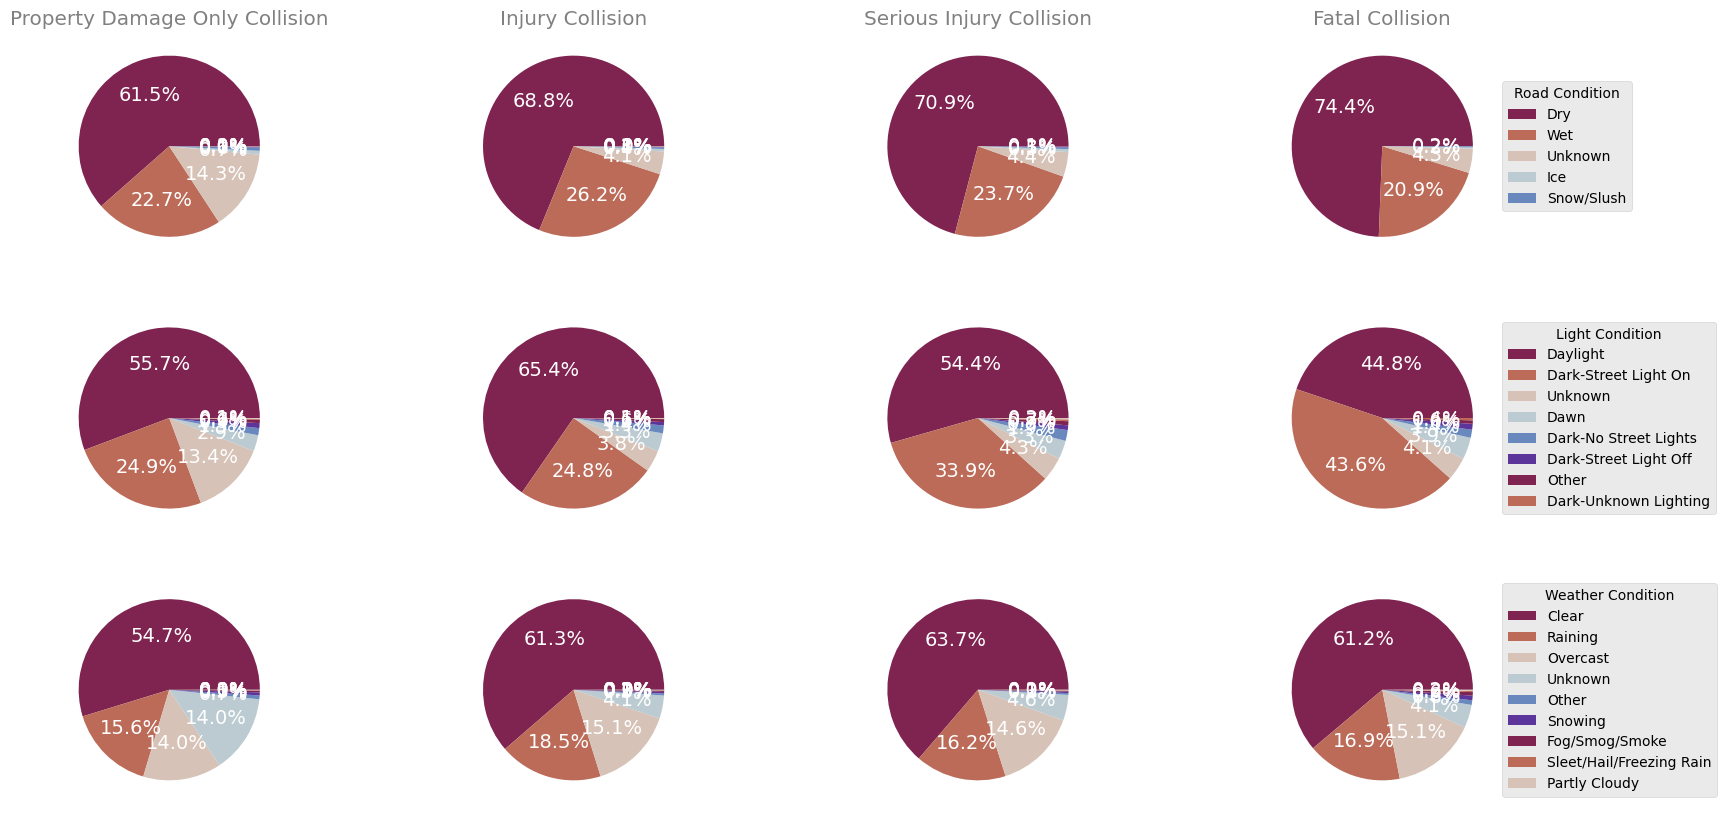

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(20,10))

sns.set_palette('twilight_shifted_r')

ax[0,0].pie(df[(df["SEVERITYCODE"]==1)]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[0,1].pie(df[(df["SEVERITYCODE"]==2)]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[0,2].pie(df[(df["SEVERITYCODE"]==3)]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[0,3].pie(df[(df["SEVERITYCODE"]==4)]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')

ax[0,0].set_title("Property Damage Only Collision",color="grey")
ax[0,1].set_title("Injury Collision",color="grey")
ax[0,2].set_title("Serious Injury Collision",color="grey")
ax[0,3].set_title("Fatal Collision",color="grey")


ax[1,0].pie(df[(df["SEVERITYCODE"]==1)]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[1,1].pie(df[(df["SEVERITYCODE"]==2)]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[1,2].pie(df[(df["SEVERITYCODE"]==3)]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[1,3].pie(df[(df["SEVERITYCODE"]==4)]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')

ax[2,0].pie(df[(df["SEVERITYCODE"]==1)]["WEATHER"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[2,1].pie(df[(df["SEVERITYCODE"]==2)]["WEATHER"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[2,2].pie(df[(df["SEVERITYCODE"]==3)]["WEATHER"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')
ax[2,3].pie(df[(df["SEVERITYCODE"]==4)]["WEATHER"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.1f%%')

ax[0,3].legend(["Dry","Wet","Unknown","Ice","Snow/Slush","Other","Standing Water","Sand/Mud/Dirt","Oil"],
          title="Road Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax[1,3].legend(["Daylight","Dark-Street Light On","Unknown","Dawn","Dark-No Street Lights","Dark-Street Light Off","Other","Dark-Unknown Lighting"],
          title="Light Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax[2,3].legend(["Clear", "Raining", "Overcast", "Unknown", "Other", "Snowing", "Fog/Smog/Smoke", "Sleet/Hail/Freezing Rain", "Partly Cloudy", "Blowing Sand/Dirt", "Severe Crosswind"],
          title="Weather Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/34.png')
plt.show()

Severe accidents are relatively less in daylight

Count of Accidents by Road Condition Type

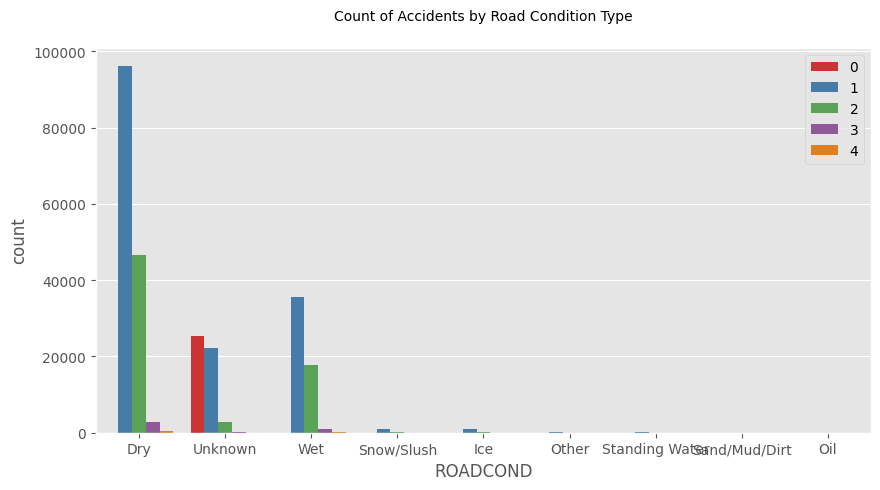

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Road Condition Type', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

Count of Accidents by Light Condition Type

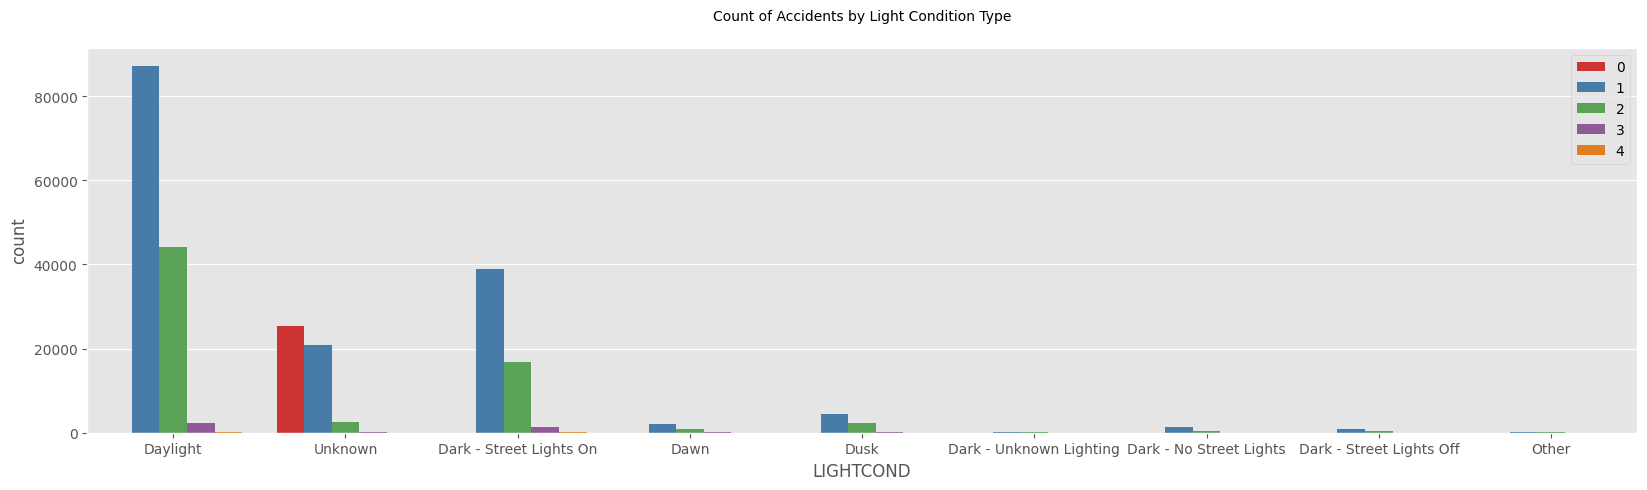

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Light Condition Type', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### **How much more dangerous is it to drive on a wet road than a dry road?**

<ipython-input-213-aac58e9588f4>:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-213-aac58e9588f4>:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



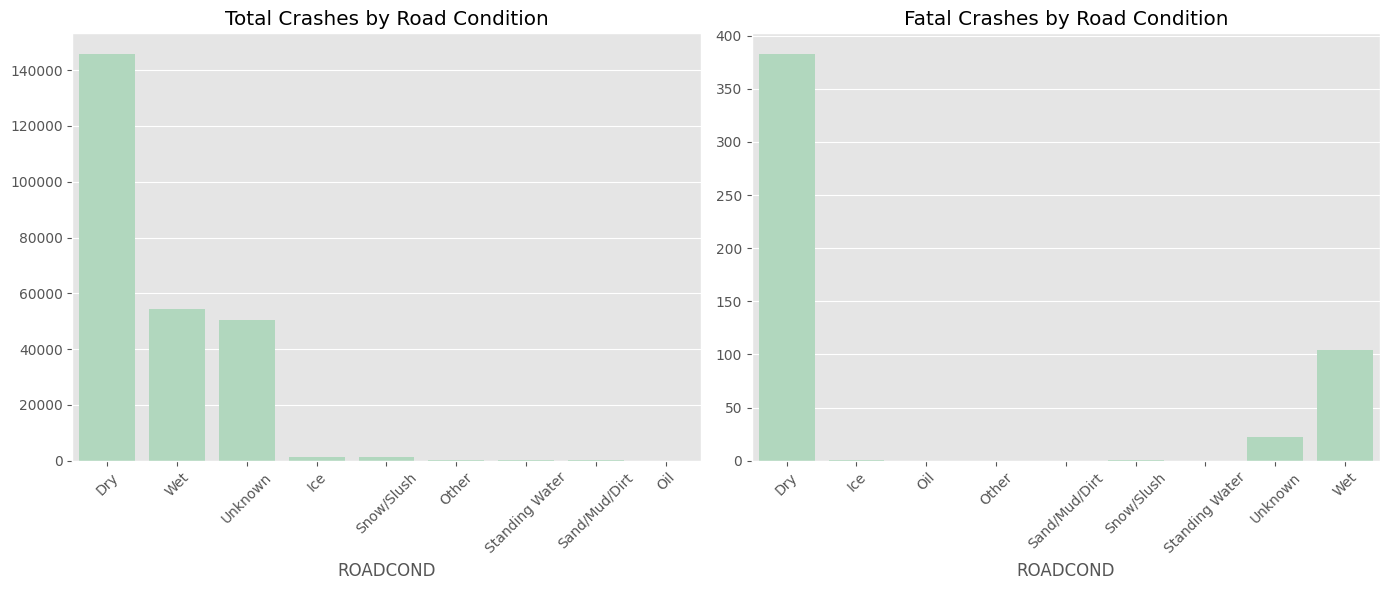

In [ ]:
# Filter crashes based on roadway surface conditions
road_condition_counts = df['ROADCOND'].value_counts()
fatal_road_condition_counts = df.groupby('ROADCOND')['FATALITIES'].sum()

# Plot Total Crashes by Road Cond. and Fatal Crashes by Road Cond.
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values, ax=ax[0])
ax[0].set_title("Total Crashes by Road Condition")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x=fatal_road_condition_counts.index, y=fatal_road_condition_counts.values, ax=ax[1])
ax[1].set_title("Fatal Crashes by Road Condition")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-214-f5c0cacb4f13>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




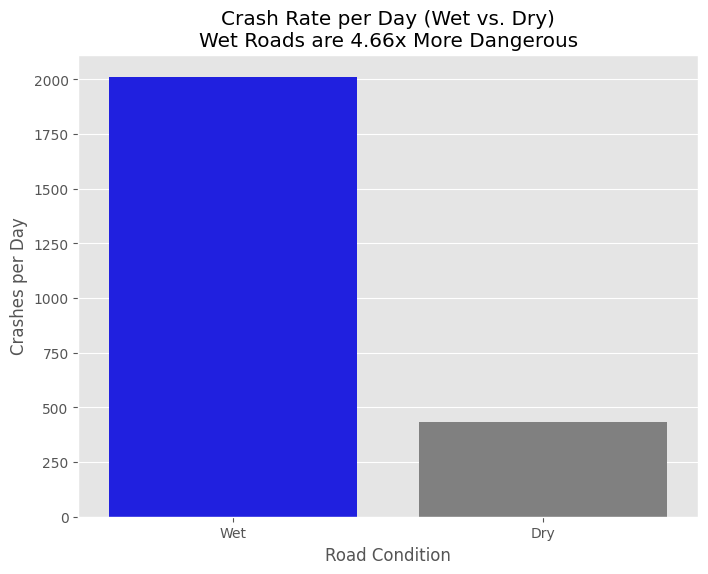

In [ ]:
#On the surface, we see that there are typically an overwhelming amount more dry road crashes than wet (or any other road condition).
#This dataset, however, only contains information on crashes. Since there are typically more dry days in a year than wet, the data will
#naturally skew towards that. We need to adjust the information accordingly. The dataset doesn't contain geographic information, unfortunately,
#so we will have to make an assumption.


# Count crashes for wet and dry road conditions
road_condition_counts = df['ROADCOND'].value_counts()

# Define the number of wet and dry days per year
wet_days_per_year = 27
total_days_per_year = 365
dry_days_per_year = total_days_per_year - wet_days_per_year

# Normalize crash rates (crashes per day)
normalized_crash_rates = {
    "Wet": road_condition_counts.get("Wet", 0) / wet_days_per_year,
    "Dry": road_condition_counts.get("Dry", 0) / dry_days_per_year
}

# Convert to DataFrame for visualization
normalized_df = pd.DataFrame.from_dict(normalized_crash_rates, orient='index', columns=['Crashes per Day'])

# Calculate risk multiplier (how much more dangerous wet roads are)
risk_multiplier = normalized_df.loc["Wet", "Crashes per Day"] / normalized_df.loc["Dry", "Crashes per Day"]

# Plot the normalized crash rate
plt.figure(figsize=(8, 6))
sns.barplot(x=normalized_df.index, y=normalized_df['Crashes per Day'], palette=["blue", "gray"])
plt.title(f"Crash Rate per Day (Wet vs. Dry)\nWet Roads are {risk_multiplier:.2f}x More Dangerous")
plt.ylabel("Crashes per Day")
plt.xlabel("Road Condition")

plt.show()

Insights: Based on this, we can see that you are over 2x more likely to be involved in an accident on a wet road than a dry road.

### **Count of Accidents by Junction Type**

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x='JUNCTIONTYPE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Junction Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 10})
plt.show()

### **Count of Accidents by Collision Codes**

In [ ]:
collision_dict = dict(zip(df['STCOLCODE'], df['ST_COLDESC']))
for key, value in sorted(collision_dict.items()): # Iterate through key-value pairs using .items()
    print(f"Collision Code: {key}, Description: {value}") # Print in desired format

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x='STCOLCODE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Collision Code', size=10, y=1.05)
plt.legend(loc='upper left', prop={'size': 10})
plt.show()

Major damage is the propert damage where one car is moving and one parked. Angles, rear end and fixed object collisions cause damages too.

### **Count of Accidents where Parked Car was hit**

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='HITPARKEDCAR', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents where parked car was hit', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### **Severity Code vs Injuries, Serious Injuries and Fatalitites**

In [ ]:
df.groupby(
     ['SEVERITYCODE']
 ).agg(
     sum_INJURIES =            ('INJURIES','sum'),
     sum_SERIOUSINJURIES =     ('SERIOUSINJURIES','sum'),
     sum_FATALITIES =          ('FATALITIES','sum'),
 ).reset_index()

**Correlation**

In [ ]:
x_cols = [col for col in df.columns if col not in ['SEVERITYCODE'] if ((col =='INJURIES') or (col == 'SERIOUSINJURIES')
                                                                       or (col == 'FATALITIES'))]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df['SEVERITYCODE'].values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,2))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient", fontsize=10)
ax.set_title("Correlation coefficient of the injury variables", fontsize=10)
plt.show()

Insights: The matrix is indicating a very strong correlation with severity. Since, apart from Severity Code = 1 ("Property Damage Only Collision"), Severity code is assigned based on the injury level, the former is a direct reflection of the latter. If we use injury features as predictors, it is easly seen that those will overwhelm the other features, and the prediction will be based on the after-effects of a collision. Therefore, these three features will be ignored.

**Most severe injury**

In [ ]:
# Create a new column 'most_severe_injury' based on existing injury severity columns
# Assuming injury severity hierarchy: FATALITIES > SERIOUSINJURIES > INJURIES
df['most_severe_injury'] = df.apply(lambda row: 'Fatality' if row['FATALITIES'] > 0
                                    else ('Serious Injury' if row['SERIOUSINJURIES'] > 0
                                          else ('Injury' if row['INJURIES'] > 0
                                                else 'Property Damage')), axis=1)

# Analyzing injury severity
severity_distribution = df['most_severe_injury'].value_counts()

# Plot most severe injury distributions
plt.figure(figsize=(12, 6))
severity_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Most Severe Injury')
plt.xlabel('Severity')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## **Scenarios that lead to crashes**

In [ ]:
import pandas as pd

# Define key contributing factors
factors = ['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'UNDERINFL']

# Group by all factors and count crashes
crash_scenarios = df.groupby(factors).size().reset_index(name='Total Crashes')

# Sort to find the top 10 most severe crash scenarios
top_10_scenarios = crash_scenarios.sort_values(by='Total Crashes', ascending=False).head(10)

# Display the output in a well-structured frame
from IPython.display import display
display(top_10_scenarios.style.set_properties(**{'text-align': 'center'}))
